# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import json
from docx import Document
from docx.opc.exceptions import PackageNotFoundError
import os
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from pandas import json_normalize
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,  cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
import warnings

# Phase 1

## 1. Data Integration

### Function to Read Docx Files

In [2]:
def read_docx_file(filepath):
    doc = Document(filepath)
    doc_text = "\n".join([para.text for para in doc.paragraphs])
    return doc_text

In [3]:
def process_docx_files(folder_path, start, end):
    data = {}
    for i in range(start, end + 1):
        file_path = os.path.join(folder_path, f"{i}.docx")
        print(f"Processing {file_path}...")
        try:
            doc_text = read_docx_file(file_path)
            json_data = json.loads(doc_text)
            data[f"Document_{i}"] = json_data
        except FileNotFoundError:
            print(f"File not found: {file_path}")
        except PackageNotFoundError:
            print(f"Package not found: {file_path}")
        except json.JSONDecodeError:
            print(f"Error decoding JSON in file: {file_path}")
        except Exception as e:
            print(f"An unexpected error occurred: {e}")
    return data

In [4]:
folder_path = r"C:\Users\USER 1\OneDrive\Documents\22i-0569_C_MLProject\Train"
data = process_docx_files(folder_path, 1, 72)

Processing C:\Users\USER 1\OneDrive\Documents\22i-0569_C_MLProject\Train\1.docx...
Processing C:\Users\USER 1\OneDrive\Documents\22i-0569_C_MLProject\Train\2.docx...
Processing C:\Users\USER 1\OneDrive\Documents\22i-0569_C_MLProject\Train\3.docx...
Processing C:\Users\USER 1\OneDrive\Documents\22i-0569_C_MLProject\Train\4.docx...
Processing C:\Users\USER 1\OneDrive\Documents\22i-0569_C_MLProject\Train\5.docx...
Processing C:\Users\USER 1\OneDrive\Documents\22i-0569_C_MLProject\Train\6.docx...
Processing C:\Users\USER 1\OneDrive\Documents\22i-0569_C_MLProject\Train\7.docx...
Processing C:\Users\USER 1\OneDrive\Documents\22i-0569_C_MLProject\Train\8.docx...
Processing C:\Users\USER 1\OneDrive\Documents\22i-0569_C_MLProject\Train\9.docx...
Processing C:\Users\USER 1\OneDrive\Documents\22i-0569_C_MLProject\Train\10.docx...
Processing C:\Users\USER 1\OneDrive\Documents\22i-0569_C_MLProject\Train\11.docx...
Processing C:\Users\USER 1\OneDrive\Documents\22i-0569_C_MLProject\Train\12.docx...
P

### Converting Dictionary of train data to DataFrame

In [340]:
train_data = pd.DataFrame()

for i, key in enumerate(data):
    data1 = pd.DataFrame(data[key])
    train_data = pd.concat([train_data, data1], ignore_index=True)

train_data

,type,status,departure,arrival,airline,flight,codeshared
0,departure,active,"{'iataCode': 'lhe', 'icaoCode': 'opla', 'termi...","{'iataCode': 'ruh', 'icaoCode': 'oerk', 'termi...","{'name': 'saudia', 'iataCode': 'sv', 'icaoCode...","{'number': '737', 'iataNumber': 'sv737', 'icao...",NaN
1,departure,active,"{'iataCode': 'lhe', 'icaoCode': 'opla', 'sched...","{'iataCode': 'khi', 'icaoCode': 'opkc', 'sched...","{'name': 'flyjinnah', 'iataCode': '9p', 'icaoC...","{'number': '843', 'iataNumber': '9p843', 'icao...",NaN
2,departure,active,"{'iataCode': 'lhe', 'icaoCode': 'opla', 'sched...","{'iataCode': 'khi', 'icaoCode': 'opkc', 'sched...","{'name': 'flyjinnah', 'iataCode': '9p', 'icaoC...","{'number': '841', 'iataNumber': '9p841', 'icao...",NaN
3,departure,active,"{'iataCode': 'lhe', 'icaoCode': 'opla', 'termi...","{'iataCode': 'kwi', 'icaoCode': 'okkk', 'sched...","{'name': 'pakistan international airlines', 'i...","{'number': '205', 'iataNumber': 'pk205', 'icao...",NaN
4,departure,active,"{'iataCode': 'lhe', 'icaoCode': 'opla', 'termi...","{'iataCode': 'dxb', 'icaoCode': 'omdb', 'termi...","{'name': 'serene air', 'iataCode': 'er', 'icao...","{'number': '723', 'iataNumber': 'er723', 'icao...",NaN
...,...,...,...,...,...,...,...
51567,departure,active,"{'iataCode': 'isb', 'icaoCode': 'opis', 'sched...","{'iataCode': 'khi', 'icaoCode': 'opkc', 'termi...","{'name': 'pakistan international airlines', 'i...","{'number': '309', 'iataNumber': 'pk309', 'icao...",NaN
51568,departure,active,"{'iataCode': 'isb', 'icaoCode': 'opis', 'gate'...","{'iataCode': 'auh', 'icaoCode': 'omaa', 'termi...","{'name': 'etihad airways', 'iataCode': 'ey', '...","{'number': '234', 'iataNumber': 'ey234', 'icao...",NaN
51569,departure,active,"{'iataCode': 'isb', 'icaoCode': 'opis', 'sched...","{'iataCode': 'khi', 'icaoCode': 'opkc', 'termi...","{'name': 'airblue', 'iataCode': 'pa', 'icaoCod...","{'number': '207', 'iataNumber': 'pa207', 'icao...",NaN
51570,departure,active,"{'iataCode': 'isb', 'icaoCode': 'opis', 'sched...","{'iataCode': 'khi', 'icaoCode': 'opkc', 'termi...","{'name': 'pakistan international airlines', 'i...","{'number': '301', 'iataNumber': 'pk301', 'icao...",NaN


## 2. Data Cleaning and Transformation

In [341]:
normalized_data = pd.DataFrame()
for column in ['departure', 'arrival', 'airline', 'flight', 'codeshared']:
    if column in train_data.columns:
        normalized = train_data[column].apply(lambda x: pd.Series(x) if isinstance(x, dict) else pd.Series({}))
        
        normalized.columns = [f"{column}_{col}" for col in normalized.columns]
        
        normalized_data = pd.concat([normalized_data, normalized], axis=1)

train = pd.concat([train_data.drop(['departure', 'arrival', 'airline', 'flight', 'codeshared'], axis=1, errors='ignore'), normalized_data], axis=1)

In [342]:
train

,type,status,departure_iataCode,departure_icaoCode,departure_terminal,departure_scheduledTime,departure_estimatedTime,departure_actualTime,departure_estimatedRunway,departure_actualRunway,...,arrival_estimatedRunway,arrival_actualRunway,airline_name,airline_iataCode,airline_icaoCode,flight_number,flight_iataNumber,flight_icaoNumber,codeshared_airline,codeshared_flight
0,departure,active,lhe,opla,m,2023-07-20t20:50:00.000,2023-07-20t20:00:00.000,2023-07-20t20:15:00.000,2023-07-20t20:15:00.000,2023-07-20t20:15:00.000,...,NaN,NaN,saudia,sv,sva,737,sv737,sva737,NaN,NaN
1,departure,active,lhe,opla,NaN,2023-07-18t15:05:00.000,2023-07-18t15:05:00.000,NaN,NaN,NaN,...,NaN,NaN,flyjinnah,9p,fjl,843,9p843,fjl843,NaN,NaN
2,departure,active,lhe,opla,NaN,2023-07-23t09:50:00.000,NaN,NaN,NaN,NaN,...,NaN,NaN,flyjinnah,9p,fjl,841,9p841,fjl841,NaN,NaN
3,departure,active,lhe,opla,m,2023-07-26t23:30:00.000,2023-07-26t23:30:00.000,2023-07-26t23:51:00.000,2023-07-26t23:51:00.000,2023-07-26t23:51:00.000,...,NaN,NaN,pakistan international airlines,pk,pia,205,pk205,pia205,NaN,NaN
4,departure,active,lhe,opla,m,2023-07-20t11:35:00.000,2023-07-20t17:15:00.000,NaN,NaN,NaN,...,NaN,NaN,serene air,er,sep,723,er723,sep723,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51567,departure,active,isb,opis,NaN,2024-07-06t19:00:00.000,2024-07-06t19:00:00.000,2024-07-06t19:25:00.000,2024-07-06t19:25:00.000,2024-07-06t19:25:00.000,...,NaN,NaN,pakistan international airlines,pk,pia,309,pk309,pia309,NaN,NaN
51568,departure,active,isb,opis,NaN,2024-07-06t19:45:00.000,2024-07-06t19:58:00.000,NaN,NaN,NaN,...,NaN,NaN,etihad airways,ey,etd,234,ey234,etd234,NaN,NaN
51569,departure,active,isb,opis,NaN,2024-07-04t17:00:00.000,2024-07-04t17:00:00.000,NaN,NaN,NaN,...,NaN,NaN,airblue,pa,abq,207,pa207,abq207,NaN,NaN
51570,departure,active,isb,opis,NaN,2024-07-03t10:00:00.000,2024-07-03t10:00:00.000,NaN,NaN,NaN,...,NaN,NaN,pakistan international airlines,pk,pia,301,pk301,pia301,NaN,NaN


In [343]:
normalized_data = pd.DataFrame()
for column in ['departure', 'codeshared_airline', 'codeshared_flight']:
    if column in train.columns:
        normalized = train[column].apply(lambda x: pd.Series(x) if isinstance(x, dict) else pd.Series({}))
        
        normalized.columns = [f"{column}_{col}" for col in normalized.columns]
        
        normalized_data = pd.concat([normalized_data, normalized], axis=1)
train = pd.concat([train.drop(['codeshared_airline', 'codeshared_flight'], axis=1, errors='ignore'), normalized_data], axis=1)

In [344]:
train

,type,status,departure_iataCode,departure_icaoCode,departure_terminal,departure_scheduledTime,departure_estimatedTime,departure_actualTime,departure_estimatedRunway,departure_actualRunway,...,airline_icaoCode,flight_number,flight_iataNumber,flight_icaoNumber,codeshared_airline_name,codeshared_airline_iataCode,codeshared_airline_icaoCode,codeshared_flight_number,codeshared_flight_iataNumber,codeshared_flight_icaoNumber
0,departure,active,lhe,opla,m,2023-07-20t20:50:00.000,2023-07-20t20:00:00.000,2023-07-20t20:15:00.000,2023-07-20t20:15:00.000,2023-07-20t20:15:00.000,...,sva,737,sv737,sva737,NaN,NaN,NaN,NaN,NaN,NaN
1,departure,active,lhe,opla,NaN,2023-07-18t15:05:00.000,2023-07-18t15:05:00.000,NaN,NaN,NaN,...,fjl,843,9p843,fjl843,NaN,NaN,NaN,NaN,NaN,NaN
2,departure,active,lhe,opla,NaN,2023-07-23t09:50:00.000,NaN,NaN,NaN,NaN,...,fjl,841,9p841,fjl841,NaN,NaN,NaN,NaN,NaN,NaN
3,departure,active,lhe,opla,m,2023-07-26t23:30:00.000,2023-07-26t23:30:00.000,2023-07-26t23:51:00.000,2023-07-26t23:51:00.000,2023-07-26t23:51:00.000,...,pia,205,pk205,pia205,NaN,NaN,NaN,NaN,NaN,NaN
4,departure,active,lhe,opla,m,2023-07-20t11:35:00.000,2023-07-20t17:15:00.000,NaN,NaN,NaN,...,sep,723,er723,sep723,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51567,departure,active,isb,opis,NaN,2024-07-06t19:00:00.000,2024-07-06t19:00:00.000,2024-07-06t19:25:00.000,2024-07-06t19:25:00.000,2024-07-06t19:25:00.000,...,pia,309,pk309,pia309,NaN,NaN,NaN,NaN,NaN,NaN
51568,departure,active,isb,opis,NaN,2024-07-06t19:45:00.000,2024-07-06t19:58:00.000,NaN,NaN,NaN,...,etd,234,ey234,etd234,NaN,NaN,NaN,NaN,NaN,NaN
51569,departure,active,isb,opis,NaN,2024-07-04t17:00:00.000,2024-07-04t17:00:00.000,NaN,NaN,NaN,...,abq,207,pa207,abq207,NaN,NaN,NaN,NaN,NaN,NaN
51570,departure,active,isb,opis,NaN,2024-07-03t10:00:00.000,2024-07-03t10:00:00.000,NaN,NaN,NaN,...,pia,301,pk301,pia301,NaN,NaN,NaN,NaN,NaN,NaN


### 1. Handle Missing Values.

In [345]:
train.isnull().sum()

type                                0
status                              0
departure_iataCode                  0
departure_icaoCode                  0
departure_terminal              21750
departure_scheduledTime             0
departure_estimatedTime          7007
departure_actualTime            20582
departure_estimatedRunway       20582
departure_actualRunway          20582
departure_gate                  48038
arrival_iataCode                    0
arrival_icaoCode                    0
arrival_terminal                31007
arrival_scheduledTime               0
arrival_estimatedTime           21364
arrival_baggage                 33454
arrival_gate                    48012
arrival_actualTime              51320
arrival_estimatedRunway         51320
arrival_actualRunway            51320
airline_name                        0
airline_iataCode                    0
airline_icaoCode                    0
flight_number                       0
flight_iataNumber                   0
flight_icaoN

In [347]:
datetime_cols = [
    'departure_scheduledTime', 'departure_estimatedTime', 'departure_actualTime',
    'arrival_scheduledTime', 'arrival_actualTime'
]

for col in datetime_cols:
    train[col] = pd.to_datetime(train[col], errors='coerce')


In [349]:
def handle_missing_values(data):
    for col in data.columns:
        if data[col].dtype == 'datetime64[ns]':
            data[col] = data[col].interpolate()
        elif data[col].dtype == 'object':
            # Fill missing categorical values with mode
            if data[col].mode()[0]:  # Ensure mode is defined
                data[col].fillna(data[col].mode()[0], inplace=True)
            else:
                data[col].fillna("Unknown", inplace=True)
        else:
            # Fill missing numeric values with mean
            data[col].fillna(data[col].mean(), inplace=True)

# Apply the function to your dataset
handle_missing_values(train)


In [350]:
handle_missing_values(train)

In [351]:
train

,type,status,departure_iataCode,departure_icaoCode,departure_terminal,departure_scheduledTime,departure_estimatedTime,departure_actualTime,departure_estimatedRunway,departure_actualRunway,...,airline_icaoCode,flight_number,flight_iataNumber,flight_icaoNumber,codeshared_airline_name,codeshared_airline_iataCode,codeshared_airline_icaoCode,codeshared_flight_number,codeshared_flight_iataNumber,codeshared_flight_icaoNumber
0,departure,active,lhe,opla,m,2023-07-20 20:50:00,2023-07-20 20:00:00,2023-07-20 20:15:00.000000000,2023-07-20t20:15:00.000,2023-07-20t20:15:00.000,...,sva,737,sv737,sva737,qatar airways,qr,qtr,611,qr611,qtr611
1,departure,active,lhe,opla,m,2023-07-18 15:05:00,2023-07-18 15:05:00,2023-07-22 21:27:00.000000000,2023-11-07t09:19:00.000,2023-11-07t09:19:00.000,...,fjl,843,9p843,fjl843,qatar airways,qr,qtr,611,qr611,qtr611
2,departure,active,lhe,opla,m,2023-07-23 09:50:00,2023-07-22 19:17:30,2023-07-24 22:39:00.000000000,2023-11-07t09:19:00.000,2023-11-07t09:19:00.000,...,fjl,841,9p841,fjl841,qatar airways,qr,qtr,611,qr611,qtr611
3,departure,active,lhe,opla,m,2023-07-26 23:30:00,2023-07-26 23:30:00,2023-07-26 23:51:00.000000000,2023-07-26t23:51:00.000,2023-07-26t23:51:00.000,...,pia,205,pk205,pia205,qatar airways,qr,qtr,611,qr611,qtr611
4,departure,active,lhe,opla,m,2023-07-20 11:35:00,2023-07-20 17:15:00,2023-07-26 15:08:34.285714176,2023-11-07t09:19:00.000,2023-11-07t09:19:00.000,...,sep,723,er723,sep723,qatar airways,qr,qtr,611,qr611,qtr611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51567,departure,active,isb,opis,m,2024-07-06 19:00:00,2024-07-06 19:00:00,2024-07-06 19:25:00.000000000,2024-07-06t19:25:00.000,2024-07-06t19:25:00.000,...,pia,309,pk309,pia309,qatar airways,qr,qtr,611,qr611,qtr611
51568,departure,active,isb,opis,m,2024-07-06 19:45:00,2024-07-06 19:58:00,2024-07-06 19:25:00.000000000,2023-11-07t09:19:00.000,2023-11-07t09:19:00.000,...,etd,234,ey234,etd234,qatar airways,qr,qtr,611,qr611,qtr611
51569,departure,active,isb,opis,m,2024-07-04 17:00:00,2024-07-04 17:00:00,2024-07-06 19:25:00.000000000,2023-11-07t09:19:00.000,2023-11-07t09:19:00.000,...,abq,207,pa207,abq207,qatar airways,qr,qtr,611,qr611,qtr611
51570,departure,active,isb,opis,m,2024-07-03 10:00:00,2024-07-03 10:00:00,2024-07-06 19:25:00.000000000,2023-11-07t09:19:00.000,2023-11-07t09:19:00.000,...,pia,301,pk301,pia301,qatar airways,qr,qtr,611,qr611,qtr611


### 2. Format Time Fields

In [352]:
# List of columns to convert
time_columns = [
    "departure_estimatedRunway",
    "departure_scheduledTime",
    "departure_actualRunway",
    "departure_estimatedTime",
    "departure_actualTime"
]

# Convert each column to datetime in one step
for column in time_columns:
    train[column] = pd.to_datetime(train[column], errors="coerce")


In [353]:
train

,type,status,departure_iataCode,departure_icaoCode,departure_terminal,departure_scheduledTime,departure_estimatedTime,departure_actualTime,departure_estimatedRunway,departure_actualRunway,...,airline_icaoCode,flight_number,flight_iataNumber,flight_icaoNumber,codeshared_airline_name,codeshared_airline_iataCode,codeshared_airline_icaoCode,codeshared_flight_number,codeshared_flight_iataNumber,codeshared_flight_icaoNumber
0,departure,active,lhe,opla,m,2023-07-20 20:50:00,2023-07-20 20:00:00,2023-07-20 20:15:00.000000000,2023-07-20 20:15:00,2023-07-20 20:15:00,...,sva,737,sv737,sva737,qatar airways,qr,qtr,611,qr611,qtr611
1,departure,active,lhe,opla,m,2023-07-18 15:05:00,2023-07-18 15:05:00,2023-07-22 21:27:00.000000000,2023-11-07 09:19:00,2023-11-07 09:19:00,...,fjl,843,9p843,fjl843,qatar airways,qr,qtr,611,qr611,qtr611
2,departure,active,lhe,opla,m,2023-07-23 09:50:00,2023-07-22 19:17:30,2023-07-24 22:39:00.000000000,2023-11-07 09:19:00,2023-11-07 09:19:00,...,fjl,841,9p841,fjl841,qatar airways,qr,qtr,611,qr611,qtr611
3,departure,active,lhe,opla,m,2023-07-26 23:30:00,2023-07-26 23:30:00,2023-07-26 23:51:00.000000000,2023-07-26 23:51:00,2023-07-26 23:51:00,...,pia,205,pk205,pia205,qatar airways,qr,qtr,611,qr611,qtr611
4,departure,active,lhe,opla,m,2023-07-20 11:35:00,2023-07-20 17:15:00,2023-07-26 15:08:34.285714176,2023-11-07 09:19:00,2023-11-07 09:19:00,...,sep,723,er723,sep723,qatar airways,qr,qtr,611,qr611,qtr611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51567,departure,active,isb,opis,m,2024-07-06 19:00:00,2024-07-06 19:00:00,2024-07-06 19:25:00.000000000,2024-07-06 19:25:00,2024-07-06 19:25:00,...,pia,309,pk309,pia309,qatar airways,qr,qtr,611,qr611,qtr611
51568,departure,active,isb,opis,m,2024-07-06 19:45:00,2024-07-06 19:58:00,2024-07-06 19:25:00.000000000,2023-11-07 09:19:00,2023-11-07 09:19:00,...,etd,234,ey234,etd234,qatar airways,qr,qtr,611,qr611,qtr611
51569,departure,active,isb,opis,m,2024-07-04 17:00:00,2024-07-04 17:00:00,2024-07-06 19:25:00.000000000,2023-11-07 09:19:00,2023-11-07 09:19:00,...,abq,207,pa207,abq207,qatar airways,qr,qtr,611,qr611,qtr611
51570,departure,active,isb,opis,m,2024-07-03 10:00:00,2024-07-03 10:00:00,2024-07-06 19:25:00.000000000,2023-11-07 09:19:00,2023-11-07 09:19:00,...,pia,301,pk301,pia301,qatar airways,qr,qtr,611,qr611,qtr611


## 3. Feature Engineering

### 1. Calculate Departure Delay

In [354]:
train1 = train.copy()

# Calculate the delay in minutes
train1["departure_delay_minutes"] = (
    (train1["departure_actualTime"] - train1["departure_scheduledTime"]).dt.total_seconds() / 60
)

In [355]:
train1

,type,status,departure_iataCode,departure_icaoCode,departure_terminal,departure_scheduledTime,departure_estimatedTime,departure_actualTime,departure_estimatedRunway,departure_actualRunway,...,flight_number,flight_iataNumber,flight_icaoNumber,codeshared_airline_name,codeshared_airline_iataCode,codeshared_airline_icaoCode,codeshared_flight_number,codeshared_flight_iataNumber,codeshared_flight_icaoNumber,departure_delay_minutes
0,departure,active,lhe,opla,m,2023-07-20 20:50:00,2023-07-20 20:00:00,2023-07-20 20:15:00.000000000,2023-07-20 20:15:00,2023-07-20 20:15:00,...,737,sv737,sva737,qatar airways,qr,qtr,611,qr611,qtr611,-35.000000
1,departure,active,lhe,opla,m,2023-07-18 15:05:00,2023-07-18 15:05:00,2023-07-22 21:27:00.000000000,2023-11-07 09:19:00,2023-11-07 09:19:00,...,843,9p843,fjl843,qatar airways,qr,qtr,611,qr611,qtr611,6142.000000
2,departure,active,lhe,opla,m,2023-07-23 09:50:00,2023-07-22 19:17:30,2023-07-24 22:39:00.000000000,2023-11-07 09:19:00,2023-11-07 09:19:00,...,841,9p841,fjl841,qatar airways,qr,qtr,611,qr611,qtr611,2209.000000
3,departure,active,lhe,opla,m,2023-07-26 23:30:00,2023-07-26 23:30:00,2023-07-26 23:51:00.000000000,2023-07-26 23:51:00,2023-07-26 23:51:00,...,205,pk205,pia205,qatar airways,qr,qtr,611,qr611,qtr611,21.000000
4,departure,active,lhe,opla,m,2023-07-20 11:35:00,2023-07-20 17:15:00,2023-07-26 15:08:34.285714176,2023-11-07 09:19:00,2023-11-07 09:19:00,...,723,er723,sep723,qatar airways,qr,qtr,611,qr611,qtr611,8853.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51567,departure,active,isb,opis,m,2024-07-06 19:00:00,2024-07-06 19:00:00,2024-07-06 19:25:00.000000000,2024-07-06 19:25:00,2024-07-06 19:25:00,...,309,pk309,pia309,qatar airways,qr,qtr,611,qr611,qtr611,25.000000
51568,departure,active,isb,opis,m,2024-07-06 19:45:00,2024-07-06 19:58:00,2024-07-06 19:25:00.000000000,2023-11-07 09:19:00,2023-11-07 09:19:00,...,234,ey234,etd234,qatar airways,qr,qtr,611,qr611,qtr611,-20.000000
51569,departure,active,isb,opis,m,2024-07-04 17:00:00,2024-07-04 17:00:00,2024-07-06 19:25:00.000000000,2023-11-07 09:19:00,2023-11-07 09:19:00,...,207,pa207,abq207,qatar airways,qr,qtr,611,qr611,qtr611,3025.000000
51570,departure,active,isb,opis,m,2024-07-03 10:00:00,2024-07-03 10:00:00,2024-07-06 19:25:00.000000000,2023-11-07 09:19:00,2023-11-07 09:19:00,...,301,pk301,pia301,qatar airways,qr,qtr,611,qr611,qtr611,4885.000000


In [356]:
train1["departure_delay_minutes"] = train1["departure_delay_minutes"].apply(lambda x: max(x, 0))
train1

,type,status,departure_iataCode,departure_icaoCode,departure_terminal,departure_scheduledTime,departure_estimatedTime,departure_actualTime,departure_estimatedRunway,departure_actualRunway,...,flight_number,flight_iataNumber,flight_icaoNumber,codeshared_airline_name,codeshared_airline_iataCode,codeshared_airline_icaoCode,codeshared_flight_number,codeshared_flight_iataNumber,codeshared_flight_icaoNumber,departure_delay_minutes
0,departure,active,lhe,opla,m,2023-07-20 20:50:00,2023-07-20 20:00:00,2023-07-20 20:15:00.000000000,2023-07-20 20:15:00,2023-07-20 20:15:00,...,737,sv737,sva737,qatar airways,qr,qtr,611,qr611,qtr611,0.000000
1,departure,active,lhe,opla,m,2023-07-18 15:05:00,2023-07-18 15:05:00,2023-07-22 21:27:00.000000000,2023-11-07 09:19:00,2023-11-07 09:19:00,...,843,9p843,fjl843,qatar airways,qr,qtr,611,qr611,qtr611,6142.000000
2,departure,active,lhe,opla,m,2023-07-23 09:50:00,2023-07-22 19:17:30,2023-07-24 22:39:00.000000000,2023-11-07 09:19:00,2023-11-07 09:19:00,...,841,9p841,fjl841,qatar airways,qr,qtr,611,qr611,qtr611,2209.000000
3,departure,active,lhe,opla,m,2023-07-26 23:30:00,2023-07-26 23:30:00,2023-07-26 23:51:00.000000000,2023-07-26 23:51:00,2023-07-26 23:51:00,...,205,pk205,pia205,qatar airways,qr,qtr,611,qr611,qtr611,21.000000
4,departure,active,lhe,opla,m,2023-07-20 11:35:00,2023-07-20 17:15:00,2023-07-26 15:08:34.285714176,2023-11-07 09:19:00,2023-11-07 09:19:00,...,723,er723,sep723,qatar airways,qr,qtr,611,qr611,qtr611,8853.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51567,departure,active,isb,opis,m,2024-07-06 19:00:00,2024-07-06 19:00:00,2024-07-06 19:25:00.000000000,2024-07-06 19:25:00,2024-07-06 19:25:00,...,309,pk309,pia309,qatar airways,qr,qtr,611,qr611,qtr611,25.000000
51568,departure,active,isb,opis,m,2024-07-06 19:45:00,2024-07-06 19:58:00,2024-07-06 19:25:00.000000000,2023-11-07 09:19:00,2023-11-07 09:19:00,...,234,ey234,etd234,qatar airways,qr,qtr,611,qr611,qtr611,0.000000
51569,departure,active,isb,opis,m,2024-07-04 17:00:00,2024-07-04 17:00:00,2024-07-06 19:25:00.000000000,2023-11-07 09:19:00,2023-11-07 09:19:00,...,207,pa207,abq207,qatar airways,qr,qtr,611,qr611,qtr611,3025.000000
51570,departure,active,isb,opis,m,2024-07-03 10:00:00,2024-07-03 10:00:00,2024-07-06 19:25:00.000000000,2023-11-07 09:19:00,2023-11-07 09:19:00,...,301,pk301,pia301,qatar airways,qr,qtr,611,qr611,qtr611,4885.000000


### 2. Merge Weather Data:

In [357]:
def data_dic(data):
    results_dict = {}

    for column in data.columns:
        first_row = data[column].iloc[0]
        if isinstance(first_row, str):
            data_list = first_row.split()

            results_dict[column] = data_list

    return results_dict

In [358]:
def new_data(result):
    try:
        time_period = result['Time'][0]
        time_values = pd.Series(result['Time'])[1:].reset_index(drop=True)  # Skip first row
        precip_values = pd.Series(result['Precipitation (in)'])[1:].reset_index(drop=True)  # Skip first row

        def split_into_chunks(series, num_chunks):
            """
            Splits a pandas Series into n approximately equal chunks.
            Pads missing entries with NaN if insufficient data.
            """
            chunk_size = len(series) // num_chunks
            chunks = []
            for i in range(num_chunks):
                start = i * chunk_size
                if i == num_chunks - 1:
                    chunks.append(series[start:])
                else:
                    chunks.append(series[start:start + chunk_size])
            max_length = max(len(chunk) for chunk in chunks)
            chunks = [chunk.reindex(range(max_length))]  # Reindex to ensure all splits are the same length
            return chunks

        def safely_extract_and_split(series, num_chunks=3):
            series = pd.Series(series)
            clean_series = pd.to_numeric(series, errors='coerce').dropna().reset_index(drop=True)

            split_data = []
            chunk_size = len(clean_series) // num_chunks  # Determine chunk sizes
            for i in range(num_chunks):
                split_data.append(clean_series.iloc[i * chunk_size:(i + 1) * chunk_size].reset_index(drop=True))

            split_data = [split.fillna(0) for split in split_data]  # Ensure all splits have similar length

            return split_data

        temperature_split = safely_extract_and_split(result['Temperature (°F)'])
        dew_point_split = safely_extract_and_split(result['Dew Point (°F)'])
        humidity_split = safely_extract_and_split(result['Humidity (%)'])
        wind_speed_split = safely_extract_and_split(result['Wind Speed (mph)'])
        pressure_split = safely_extract_and_split(result['Pressure (in)'])

        final_df = pd.DataFrame({
            'Date': time_values,
            'Month': time_period,
            'Precipitation (in)': precip_values,
            'Temperature Max': temperature_split[0],
            'Temperature Avg': temperature_split[1],
            'Temperature Min': temperature_split[2],
            'Dew Point Max': dew_point_split[0],
            'Dew Point Avg': dew_point_split[1],
            'Dew Point Min': dew_point_split[2],
            'Humidity Max': humidity_split[0],
            'Humidity Avg': humidity_split[1],
            'Humidity Min': humidity_split[2],
            'Wind Speed Max': wind_speed_split[0],
            'Wind Speed Avg': wind_speed_split[1],
            'Wind Speed Min': wind_speed_split[2],
            'Pressure Max': pressure_split[0],
            'Pressure Avg': pressure_split[1],
            'Pressure Min': pressure_split[2],
        })

        return final_df

    except KeyError as e:
        print(f"Missing key in result dictionary: {e}")
        return pd.DataFrame()  # Return empty DataFrame if keys are invalid


In [359]:
def process_all_weather_files(directory_path):
    all_processed_dfs = []
    
    for file_name in os.listdir(directory_path):
        if file_name.endswith('.xlsx') or file_name.endswith('.xls'):  # Process only Excel files
            file_path = os.path.join(directory_path, file_name)
            
            weather_data = pd.read_excel(file_path)
            
            result_dict = data_dic(weather_data)
            processed_df = new_data(result_dict)

            all_processed_dfs.append(processed_df)
    
    final_combined_df = pd.concat(all_processed_dfs, ignore_index=True)
    
    return final_combined_df

In [360]:
directory_path = r"C:\Users\USER 1\OneDrive\Documents\22i-0569_C_MLProject\Weather"
final_df = process_all_weather_files(directory_path)

In [361]:
for i in range(len(final_df)):
    if final_df["Month"][i] == "Jul2023":
        final_df.at[i, "Year"] = 2023
        final_df["Month"][i] = 7
    elif final_df["Month"][i] == "Jul2024":
        final_df.at[i, "Year"] = 2024
        final_df["Month"][i] = 7
    elif final_df["Month"][i] == "Aug":
        final_df.at[i, "Year"] = 2023
        final_df["Month"][i] = 8
    elif final_df["Month"][i] == "Sep":
        final_df.at[i, "Year"] = 2023
        final_df["Month"][i] = 9
    elif final_df["Month"][i] == "Oct":
        final_df.at[i, "Year"] = 2023
        final_df["Month"][i] = 10
    elif final_df["Month"][i] == "Nov":
        final_df.at[i, "Year"] = 2023
        final_df["Month"][i] = 11
    elif final_df["Month"][i] == "Dec":
        final_df.at[i, "Year"] = 2023
        final_df["Month"][i] = 12
    elif final_df["Month"][i] == "Jan":
        final_df.at[i, "Year"] = 2024
        final_df["Month"][i] = 1
    elif final_df["Month"][i] == "Feb":
        final_df.at[i, "Year"] = 2024
        final_df["Month"][i] = 2
    elif final_df["Month"][i] == "Mar":
        final_df.at[i, "Year"] = 2024
        final_df["Month"][i] = 3
    elif final_df["Month"][i] == "Apr":
        final_df.at[i, "Year"] = 2024
        final_df["Month"][i] = 4
    elif final_df["Month"][i] == "May":
        final_df.at[i, "Year"] = 2024
        final_df["Month"][i] = 5
    elif final_df["Month"][i] == "Jun":
        final_df.at[i, "Year"] = 2024
        final_df["Month"][i] = 6

C:\Users\USER 1\AppData\Local\Temp\ipykernel_8492\3518696857.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["Month"][i] = 7
C:\Users\USER 1\AppData\Local\Temp\ipykernel_8492\3518696857.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["Month"][i] = 7
C:\Users\USER 1\AppData\Local\Temp\ipykernel_8492\3518696857.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["Month"][i] = 7
C:\Users\USER 1\AppData\L

In [362]:
final_df

,Date,Month,Precipitation (in),Temperature Max,Temperature Avg,Temperature Min,Dew Point Max,Dew Point Avg,Dew Point Min,Humidity Max,Humidity Avg,Humidity Min,Wind Speed Max,Wind Speed Avg,Wind Speed Min,Pressure Max,Pressure Avg,Pressure Min,Year
0,1,7,0.00,97.0,87.0,82.0,77.0,74.5,77.0,74.0,67.8,70.0,14.0,7.2,0.0,28.8,28.2,28.8,2023.0
1,2,7,0.00,88.8,79.0,82.0,74.5,72.0,79.0,63.4,50.0,100.0,8.9,0.0,21.0,28.8,0.0,29.0,2023.0
2,3,7,0.00,81.0,97.0,79.3,72.0,79.0,76.0,47.0,84.0,90.3,5.0,35.0,12.0,28.7,28.9,26.6,2023.0
3,4,7,0.00,99.0,87.5,77.0,79.0,75.5,73.0,79.0,68.3,83.0,12.0,9.5,3.0,28.8,28.8,0.0,2023.0
4,5,7,0.00,91.5,81.0,95.0,75.8,70.0,79.0,61.3,53.0,83.0,6.7,0.0,14.0,28.8,28.7,29.0,2023.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,27,3,0.00,52.0,90.0,73.6,32.0,55.0,61.8,19.0,77.0,67.9,0.0,21.0,13.3,29.2,29.2,29.1,2024.0
376,28,3,0.00,77.0,75.9,63.0,50.0,50.4,59.0,67.0,44.8,51.0,9.0,5.3,0.0,29.3,29.2,29.0,2024.0
377,29,3,0.00,67.7,59.0,81.0,44.0,43.0,59.0,44.9,21.0,88.0,2.7,0.0,23.0,29.2,29.1,29.2,2024.0
378,30,3,0.00,55.0,84.0,70.3,39.0,63.0,57.5,26.0,78.0,66.5,0.0,21.0,11.4,29.2,29.2,28.6,2024.0


In [363]:
for i in final_df.columns:
    final_df[i] = final_df[i].astype(float)

In [364]:
final_df['Date'] = final_df['Date'].astype(int)
final_df['Year'] = final_df['Year'].astype(int)
final_df['Month'] = final_df['Month'].astype(int)

In [365]:
train_data = train1.copy()
train_data['departure_scheduled_date'] = train_data['departure_scheduledTime'].dt.date          # Extract only the date
train_data['departure_scheduled_time'] = train_data['departure_scheduledTime'].dt.time          # Extract only the time
train_data['Date'] = train_data['departure_scheduledTime'].dt.day            # Extract the day
train_data['Month'] = train_data['departure_scheduledTime'].dt.month        # Extract the month
train_data['Year'] = train_data['departure_scheduledTime'].dt.year          # Extract the year
train_data['departure_scheduled_hour'] = train_data['departure_scheduledTime'].dt.hour          # Extract the hour
train_data['departure_scheduled_minute'] = train_data['departure_scheduledTime'].dt.minute      # Extract the minute
train_data['departure_scheduled_second'] = train_data['departure_scheduledTime'].dt.second      # Extract the second
train_data

,type,status,departure_iataCode,departure_icaoCode,departure_terminal,departure_scheduledTime,departure_estimatedTime,departure_actualTime,departure_estimatedRunway,departure_actualRunway,...,codeshared_flight_icaoNumber,departure_delay_minutes,departure_scheduled_date,departure_scheduled_time,Date,Month,Year,departure_scheduled_hour,departure_scheduled_minute,departure_scheduled_second
0,departure,active,lhe,opla,m,2023-07-20 20:50:00,2023-07-20 20:00:00,2023-07-20 20:15:00.000000000,2023-07-20 20:15:00,2023-07-20 20:15:00,...,qtr611,0.000000,2023-07-20,20:50:00,20,7,2023,20,50,0
1,departure,active,lhe,opla,m,2023-07-18 15:05:00,2023-07-18 15:05:00,2023-07-22 21:27:00.000000000,2023-11-07 09:19:00,2023-11-07 09:19:00,...,qtr611,6142.000000,2023-07-18,15:05:00,18,7,2023,15,5,0
2,departure,active,lhe,opla,m,2023-07-23 09:50:00,2023-07-22 19:17:30,2023-07-24 22:39:00.000000000,2023-11-07 09:19:00,2023-11-07 09:19:00,...,qtr611,2209.000000,2023-07-23,09:50:00,23,7,2023,9,50,0
3,departure,active,lhe,opla,m,2023-07-26 23:30:00,2023-07-26 23:30:00,2023-07-26 23:51:00.000000000,2023-07-26 23:51:00,2023-07-26 23:51:00,...,qtr611,21.000000,2023-07-26,23:30:00,26,7,2023,23,30,0
4,departure,active,lhe,opla,m,2023-07-20 11:35:00,2023-07-20 17:15:00,2023-07-26 15:08:34.285714176,2023-11-07 09:19:00,2023-11-07 09:19:00,...,qtr611,8853.571429,2023-07-20,11:35:00,20,7,2023,11,35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51567,departure,active,isb,opis,m,2024-07-06 19:00:00,2024-07-06 19:00:00,2024-07-06 19:25:00.000000000,2024-07-06 19:25:00,2024-07-06 19:25:00,...,qtr611,25.000000,2024-07-06,19:00:00,6,7,2024,19,0,0
51568,departure,active,isb,opis,m,2024-07-06 19:45:00,2024-07-06 19:58:00,2024-07-06 19:25:00.000000000,2023-11-07 09:19:00,2023-11-07 09:19:00,...,qtr611,0.000000,2024-07-06,19:45:00,6,7,2024,19,45,0
51569,departure,active,isb,opis,m,2024-07-04 17:00:00,2024-07-04 17:00:00,2024-07-06 19:25:00.000000000,2023-11-07 09:19:00,2023-11-07 09:19:00,...,qtr611,3025.000000,2024-07-04,17:00:00,4,7,2024,17,0,0
51570,departure,active,isb,opis,m,2024-07-03 10:00:00,2024-07-03 10:00:00,2024-07-06 19:25:00.000000000,2023-11-07 09:19:00,2023-11-07 09:19:00,...,qtr611,4885.000000,2024-07-03,10:00:00,3,7,2024,10,0,0


In [421]:
merged_df = pd.merge(train_data, final_df, on=['Date', 'Month', 'Year'])
merged_df

,type,status,departure_iataCode,departure_icaoCode,departure_terminal,departure_scheduledTime,departure_estimatedTime,departure_actualTime,departure_estimatedRunway,departure_actualRunway,...,Dew Point Min,Humidity Max,Humidity Avg,Humidity Min,Wind Speed Max,Wind Speed Avg,Wind Speed Min,Pressure Max,Pressure Avg,Pressure Min
0,departure,active,lhe,opla,m,2023-07-20 20:50:00,2023-07-20 20:00:00,2023-07-20 20:15:00.000000000,2023-07-20 20:15:00,2023-07-20 20:15:00,...,79.0,75.0,59.0,89.0,9.5,0.0,13.0,28.9,28.7,28.8
1,departure,active,lhe,opla,m,2023-07-20 11:35:00,2023-07-20 17:15:00,2023-07-26 15:08:34.285714176,2023-11-07 09:19:00,2023-11-07 09:19:00,...,79.0,75.0,59.0,89.0,9.5,0.0,13.0,28.9,28.7,28.8
2,departure,active,lhe,opla,m,2023-07-20 22:20:00,2023-07-20 23:20:00,2023-07-19 22:45:20.000000000,2023-11-07 09:19:00,2023-11-07 09:19:00,...,79.0,75.0,59.0,89.0,9.5,0.0,13.0,28.9,28.7,28.8
3,departure,active,lhe,opla,m,2023-07-20 21:10:00,2023-07-20 21:10:00,2023-07-26 01:34:40.000000000,2023-11-07 09:19:00,2023-11-07 09:19:00,...,79.0,75.0,59.0,89.0,9.5,0.0,13.0,28.9,28.7,28.8
4,departure,active,lhe,opla,m,2023-07-20 09:55:00,2023-07-28 22:02:30,2023-07-20 10:09:00.000000000,2023-07-20 10:09:00,2023-07-20 10:09:00,...,79.0,75.0,59.0,89.0,9.5,0.0,13.0,28.9,28.7,28.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51567,departure,active,khi,opkc,m,2024-07-10 02:30:00,2024-07-10 02:30:00,2024-07-10 02:44:00.000000000,2024-07-10 02:44:00,2024-07-10 02:44:00,...,71.7,89.0,50.0,65.2,40.0,0.0,5.4,28.8,28.8,28.7
51568,departure,active,isb,opis,m,2024-07-10 03:10:00,2024-07-10 03:10:00,2024-07-10 03:28:00.000000000,2024-07-10 03:28:00,2024-07-10 03:28:00,...,71.7,89.0,50.0,65.2,40.0,0.0,5.4,28.8,28.8,28.7
51569,departure,active,isb,opis,m,2024-07-10 02:10:00,2024-07-10 04:25:00,2024-07-07 06:25:40.000000000,2023-11-07 09:19:00,2023-11-07 09:19:00,...,71.7,89.0,50.0,65.2,40.0,0.0,5.4,28.8,28.8,28.7
51570,departure,active,isb,opis,m,2024-07-10 04:35:00,2024-07-10 05:12:00,2024-07-07 15:33:30.000000000,2023-11-07 09:19:00,2023-11-07 09:19:00,...,71.7,89.0,50.0,65.2,40.0,0.0,5.4,28.8,28.8,28.7


In [784]:
merged_df.dtypes

type                                    object
status                                  object
departure_iataCode                      object
departure_icaoCode                      object
departure_terminal                      object
departure_scheduledTime         datetime64[ns]
departure_estimatedTime         datetime64[ns]
departure_actualTime            datetime64[ns]
departure_estimatedRunway       datetime64[ns]
departure_actualRunway          datetime64[ns]
departure_gate                          object
arrival_iataCode                        object
arrival_icaoCode                        object
arrival_terminal                        object
arrival_scheduledTime           datetime64[ns]
arrival_estimatedTime                   object
arrival_baggage                         object
arrival_gate                            object
arrival_actualTime              datetime64[ns]
arrival_estimatedRunway                 object
arrival_actualRunway                    object
airline_name 

In [786]:
merge1 = merged_df.copy()
merge1['DayOfWeek'] = pd.to_datetime(merge1['departure_scheduledTime']).dt.day_name()
merge1['IsWeekend'] = merge1['DayOfWeek'].isin(['Saturday', 'Sunday']).astype(int)
merge1['TimeOfDay'] = pd.cut(
    merge1['departure_scheduled_hour'],
    bins=[-1, 5, 12, 17, 21, 24],
    labels=['Night', 'Morning', 'Afternoon', 'Evening', 'Night'],
    right=False,
    ordered=False  # Allow non-unique labels
)

In [787]:
merge1

,type,status,departure_iataCode,departure_icaoCode,departure_terminal,departure_scheduledTime,departure_estimatedTime,departure_actualTime,departure_estimatedRunway,departure_actualRunway,...,Humidity Min,Wind Speed Max,Wind Speed Avg,Wind Speed Min,Pressure Max,Pressure Avg,Pressure Min,DayOfWeek,IsWeekend,TimeOfDay
0,departure,active,lhe,opla,m,2023-07-20 20:50:00,2023-07-20 20:00:00,2023-07-20 20:15:00.000000000,2023-07-20 20:15:00,2023-07-20 20:15:00,...,89.0,9.5,0.0,13.0,28.9,28.7,28.8,Thursday,0,Evening
1,departure,active,lhe,opla,m,2023-07-20 11:35:00,2023-07-20 17:15:00,2023-07-26 15:08:34.285714176,2023-11-07 09:19:00,2023-11-07 09:19:00,...,89.0,9.5,0.0,13.0,28.9,28.7,28.8,Thursday,0,Morning
2,departure,active,lhe,opla,m,2023-07-20 22:20:00,2023-07-20 23:20:00,2023-07-19 22:45:20.000000000,2023-11-07 09:19:00,2023-11-07 09:19:00,...,89.0,9.5,0.0,13.0,28.9,28.7,28.8,Thursday,0,Night
3,departure,active,lhe,opla,m,2023-07-20 21:10:00,2023-07-20 21:10:00,2023-07-26 01:34:40.000000000,2023-11-07 09:19:00,2023-11-07 09:19:00,...,89.0,9.5,0.0,13.0,28.9,28.7,28.8,Thursday,0,Night
4,departure,active,lhe,opla,m,2023-07-20 09:55:00,2023-07-28 22:02:30,2023-07-20 10:09:00.000000000,2023-07-20 10:09:00,2023-07-20 10:09:00,...,89.0,9.5,0.0,13.0,28.9,28.7,28.8,Thursday,0,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51567,departure,active,khi,opkc,m,2024-07-10 02:30:00,2024-07-10 02:30:00,2024-07-10 02:44:00.000000000,2024-07-10 02:44:00,2024-07-10 02:44:00,...,65.2,40.0,0.0,5.4,28.8,28.8,28.7,Wednesday,0,Night
51568,departure,active,isb,opis,m,2024-07-10 03:10:00,2024-07-10 03:10:00,2024-07-10 03:28:00.000000000,2024-07-10 03:28:00,2024-07-10 03:28:00,...,65.2,40.0,0.0,5.4,28.8,28.8,28.7,Wednesday,0,Night
51569,departure,active,isb,opis,m,2024-07-10 02:10:00,2024-07-10 04:25:00,2024-07-07 06:25:40.000000000,2023-11-07 09:19:00,2023-11-07 09:19:00,...,65.2,40.0,0.0,5.4,28.8,28.8,28.7,Wednesday,0,Night
51570,departure,active,isb,opis,m,2024-07-10 04:35:00,2024-07-10 05:12:00,2024-07-07 15:33:30.000000000,2023-11-07 09:19:00,2023-11-07 09:19:00,...,65.2,40.0,0.0,5.4,28.8,28.8,28.7,Wednesday,0,Night


# Phase 2: Exploratory Data Analysis (EDA)

## 1. Visualizations

### Delay Distributions

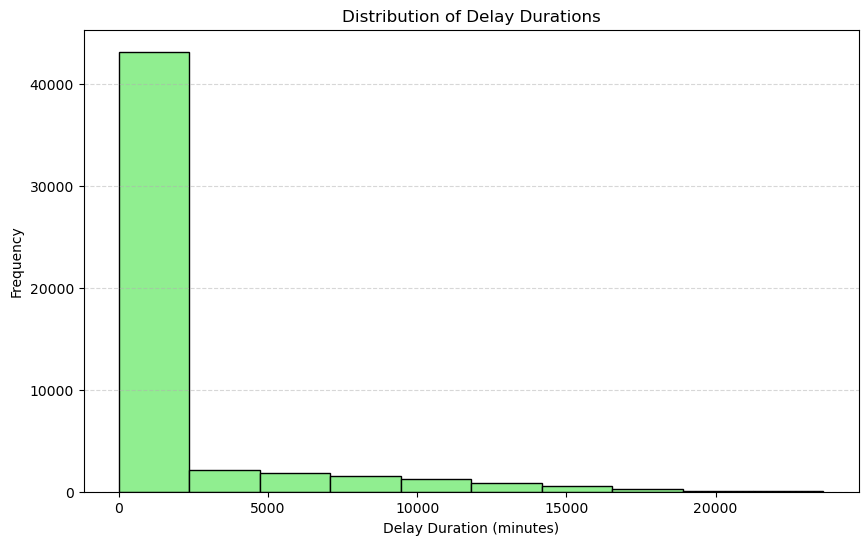

In [422]:
plt.figure(figsize=(10, 6))
plt.hist(merged_df['departure_delay_minutes'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Distribution of Delay Durations')
plt.xlabel('Delay Duration (minutes)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

### Temporal Analysis

#### Line and Bar Graph Showcasing Delays across Hours

In [423]:
hourly_delays = merged_df.groupby('departure_scheduled_hour')['departure_delay_minutes'].mean()

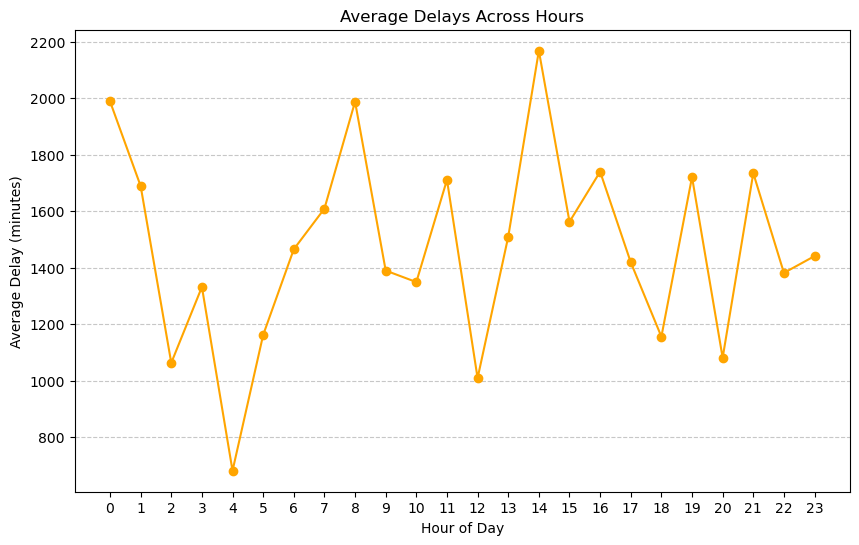

In [424]:
plt.figure(figsize=(10, 6))
plt.plot(hourly_delays.index, hourly_delays.values, marker='o', color='orange')
plt.title('Average Delays Across Hours')
plt.xlabel('Hour of Day')
plt.ylabel('Average Delay (minutes)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(0, 24))
plt.show()

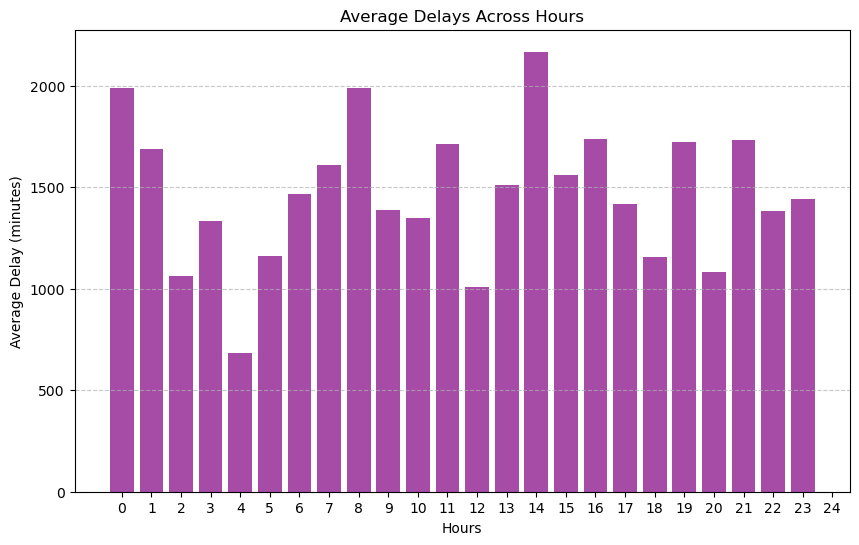

In [425]:
plt.figure(figsize=(10, 6))
plt.bar(hourly_delays.index, hourly_delays.values, color='purple', alpha=0.7)
plt.title('Average Delays Across Hours')
plt.xlabel('Hours')
plt.ylabel('Average Delay (minutes)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(0, 25))
plt.show()

#### Line and Bar Graph Showcasing Delays Across Days

In [426]:
day_delays = merged_df.groupby('Date')['departure_delay_minutes'].mean()

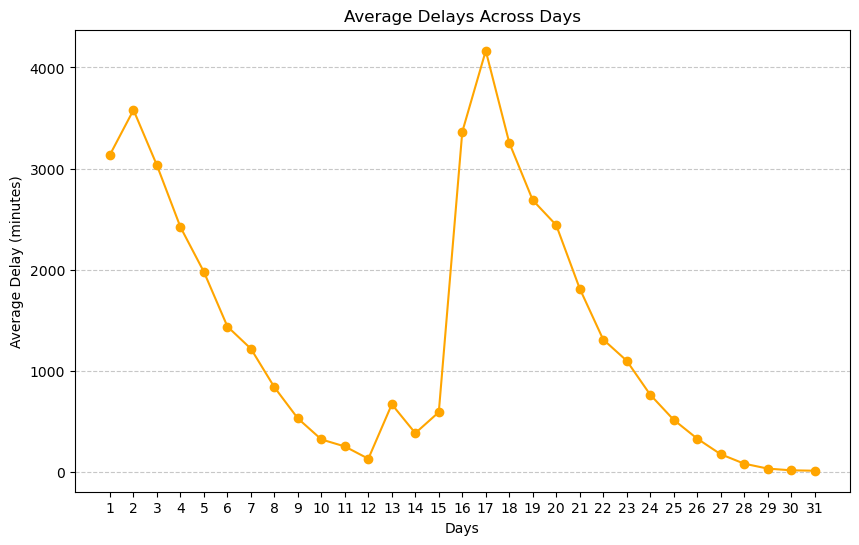

In [427]:
plt.figure(figsize=(10, 6))
plt.plot(day_delays.index, day_delays.values, marker='o', color='orange')
plt.title('Average Delays Across Days')
plt.xlabel('Days')
plt.ylabel('Average Delay (minutes)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(1, 32))
plt.show()

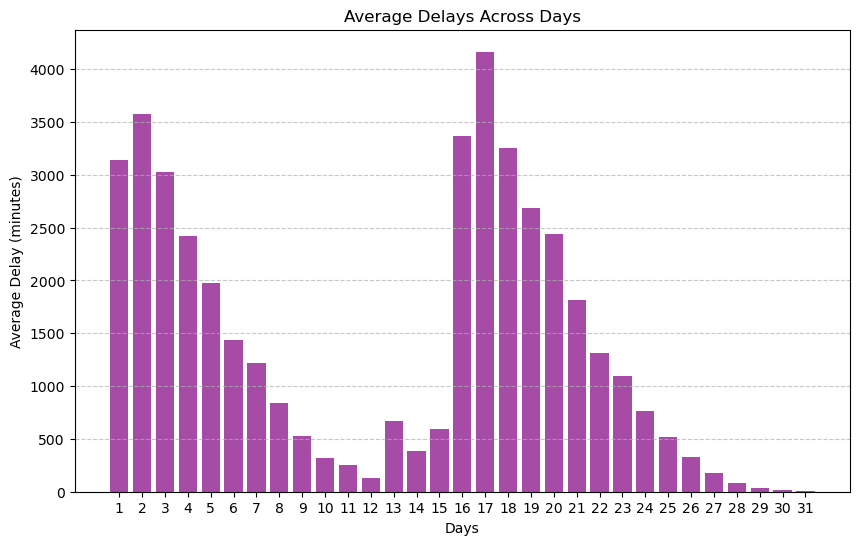

In [428]:
plt.figure(figsize=(10, 6))
plt.bar(day_delays.index, day_delays.values, color='purple', alpha=0.7)
plt.title('Average Delays Across Days')
plt.xlabel('Days')
plt.ylabel('Average Delay (minutes)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(1, 32))
plt.show()

#### Line and Bar Graph Showcasing Delays Across Months

In [429]:
monthly_delays = merged_df.groupby('Month')['departure_delay_minutes'].mean()

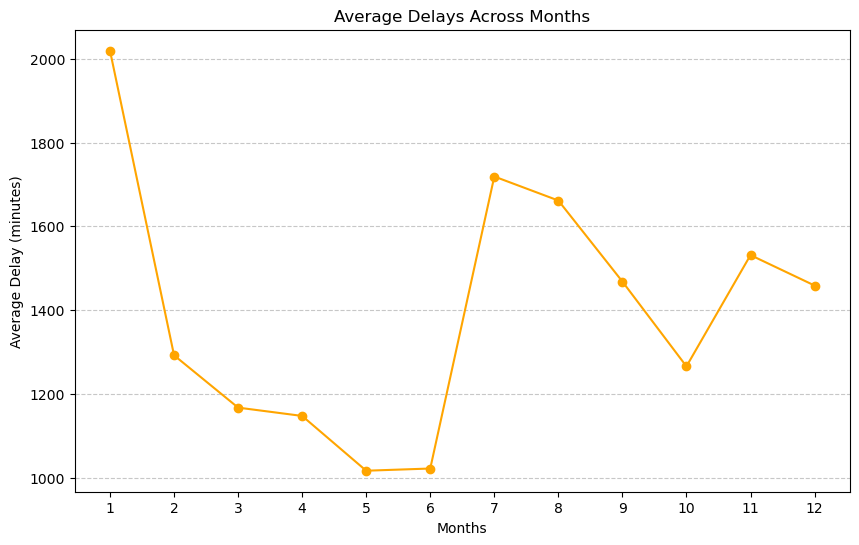

In [430]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_delays.index, monthly_delays.values, marker='o', color='orange')
plt.title('Average Delays Across Months')
plt.xlabel('Months')
plt.ylabel('Average Delay (minutes)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(1, 13))
plt.show()

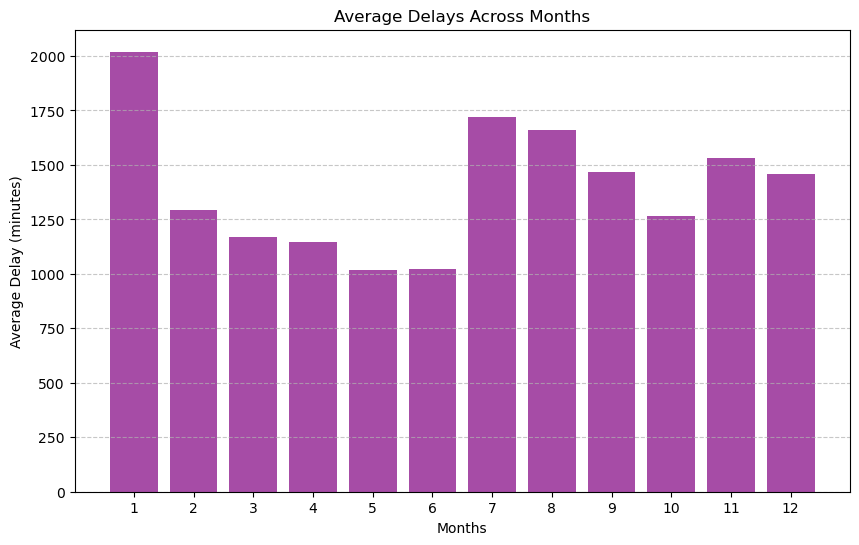

In [431]:
plt.figure(figsize=(10, 6))
plt.bar(monthly_delays.index, monthly_delays.values, color='purple', alpha=0.7)
plt.title('Average Delays Across Months')
plt.xlabel('Months')
plt.ylabel('Average Delay (minutes)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(1, 13))
plt.show()

### Category Wise Analysis

#### Line and Bar Chart Showcasing Delays by Airline

In [432]:
airline_delays = merged_df.groupby('airline_name')['departure_delay_minutes'].mean()

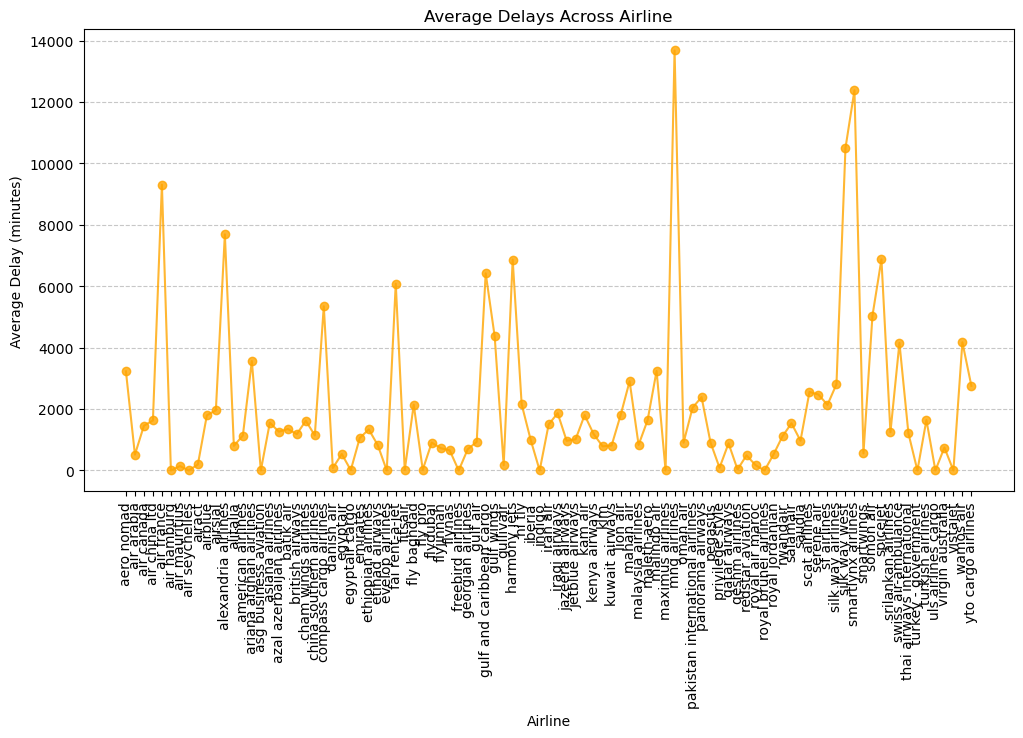

In [433]:
plt.figure(figsize=(12, 6))
plt.plot(airline_delays.index, airline_delays.values, marker='o', color='orange', alpha=0.8)
plt.title('Average Delays Across Airline')
plt.xlabel('Airline')
plt.ylabel('Average Delay (minutes)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=90)
plt.show()

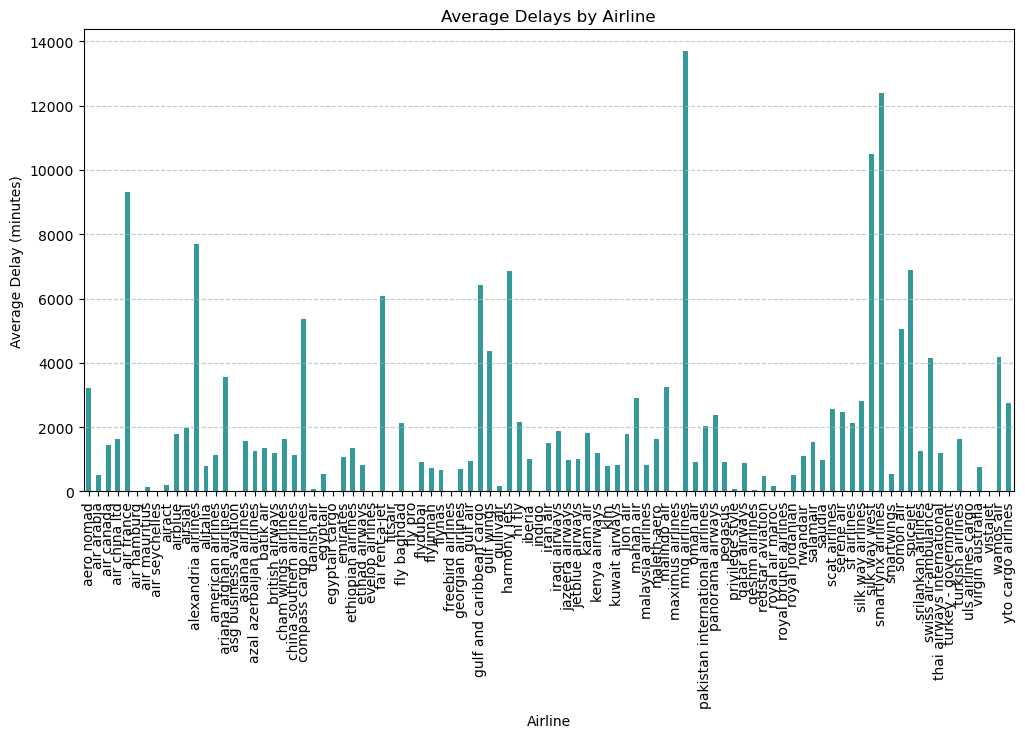

In [434]:
airline_delays.plot(kind='bar', figsize=(12, 6), color='teal', alpha=0.8)
plt.title('Average Delays by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Delay (minutes)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Line and Bar Chart Showcasing Departure Airport

In [435]:
airport_delays = merged_df.groupby('departure_iataCode')['departure_delay_minutes'].mean()

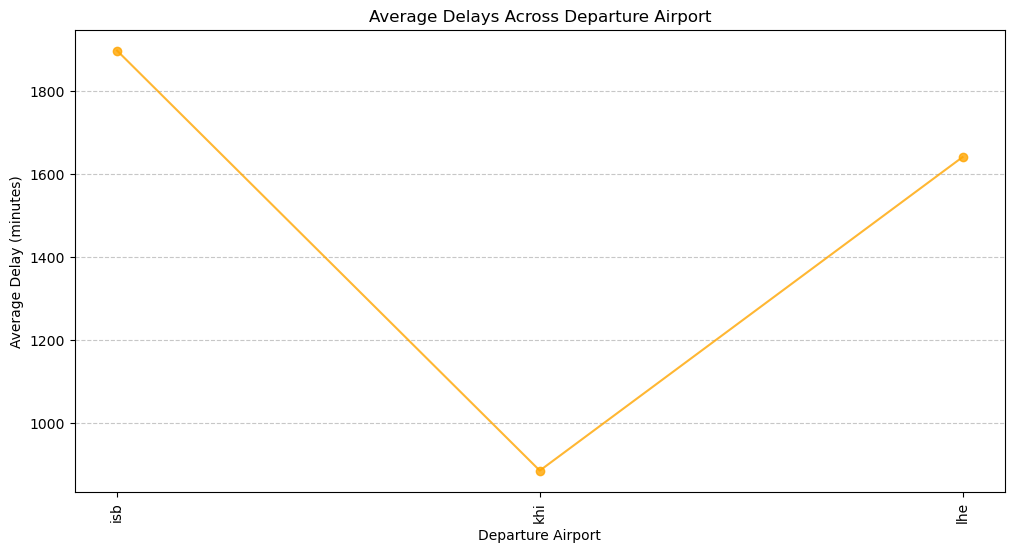

In [436]:
plt.figure(figsize=(12, 6))
plt.plot(airport_delays.index, airport_delays.values, marker='o', color='orange', alpha=0.8)
plt.title('Average Delays Across Departure Airport')
plt.xlabel('Departure Airport')
plt.ylabel('Average Delay (minutes)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=90)
plt.show()

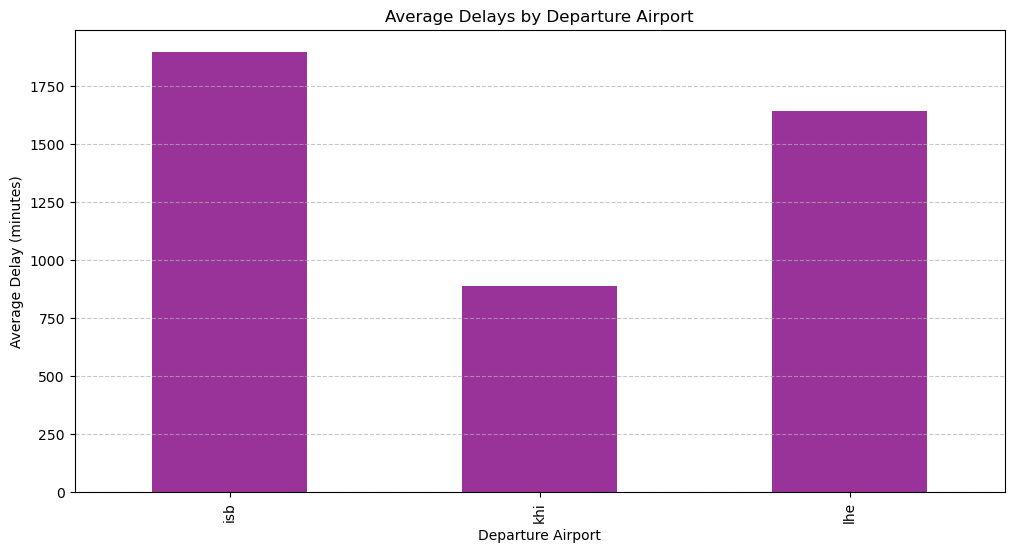

In [437]:
airport_delays.plot(kind='bar', figsize=(12, 6), color='purple', alpha=0.8)
plt.title('Average Delays by Departure Airport')
plt.xlabel('Departure Airport')
plt.ylabel('Average Delay (minutes)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Line and Bar Chart Showcasing Delays across Flight Status

In [438]:
status_delays = merged_df.groupby('status')['departure_delay_minutes'].mean()

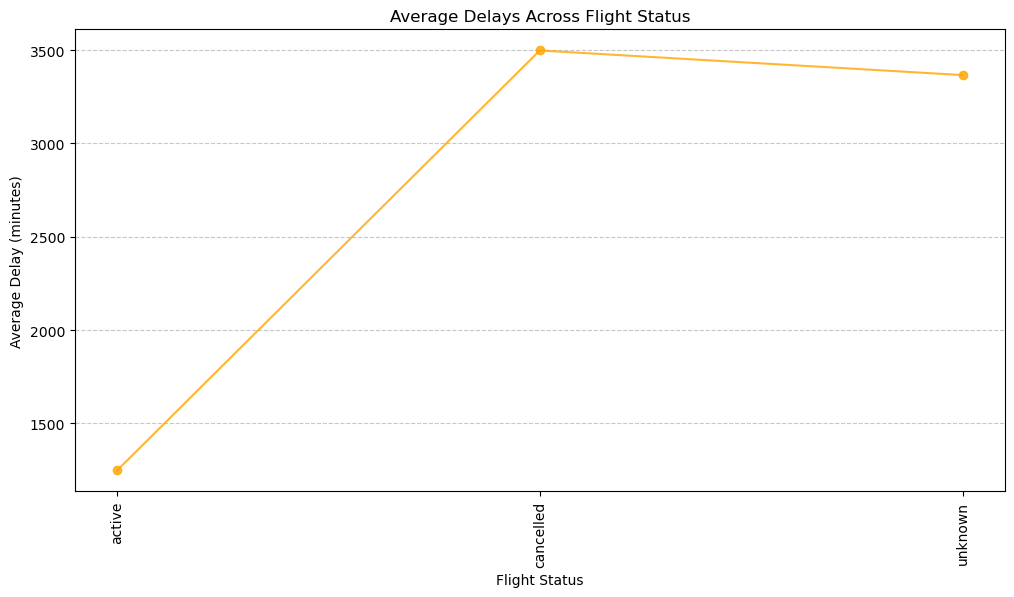

In [439]:
plt.figure(figsize=(12, 6))
plt.plot(status_delays.index, status_delays.values, marker='o', color='orange', alpha=0.8)
plt.title('Average Delays Across Flight Status')
plt.xlabel('Flight Status')
plt.ylabel('Average Delay (minutes)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=90)
plt.show()

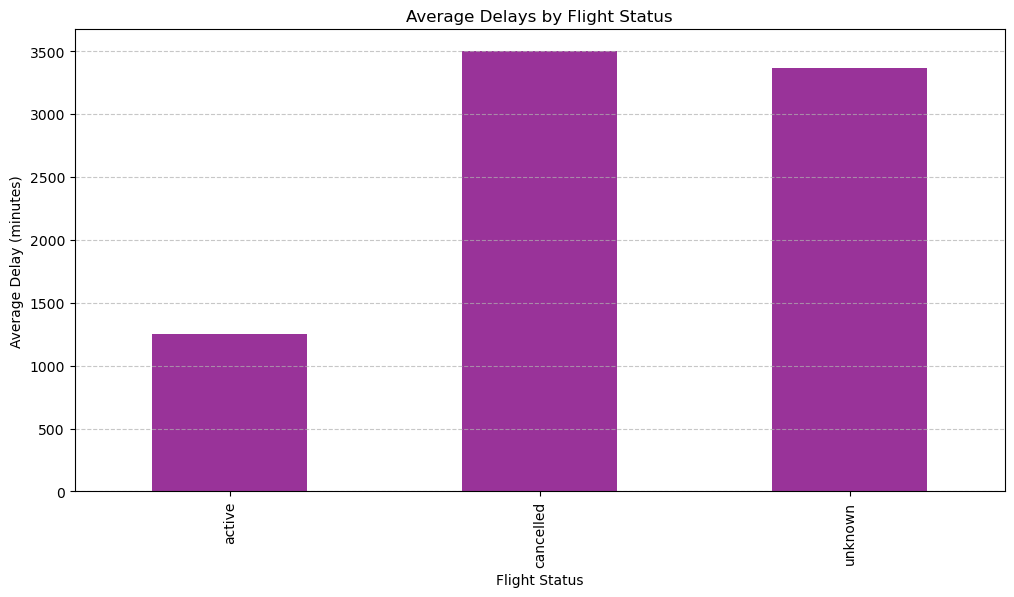

In [440]:
status_delays.plot(kind='bar', figsize=(12, 6), color='purple', alpha=0.8)
plt.title('Average Delays by Flight Status')
plt.xlabel('Flight Status')
plt.ylabel('Average Delay (minutes)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 2. Correlation Analysis

In [441]:
columns_to_correlate = ['Temperature Avg', 'Humidity Avg', 'Wind Speed Avg', 'departure_delay_minutes']
correlation_matrix = merged_df[columns_to_correlate].corr()

correlation_matrix

,Temperature Avg,Humidity Avg,Wind Speed Avg,departure_delay_minutes
Temperature Avg,1.000000,0.012238,0.472939,-0.043942
Humidity Avg,0.012238,1.000000,0.322073,0.036114
Wind Speed Avg,0.472939,0.322073,1.000000,-0.009927
departure_delay_minutes,-0.043942,0.036114,-0.009927,1.000000


### Heatmap Visualization

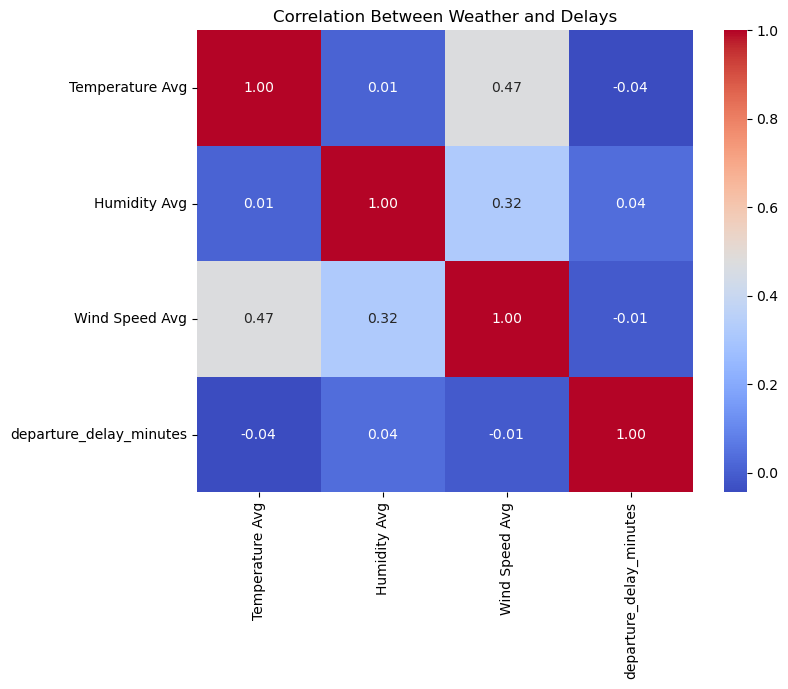

In [442]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Weather and Delays')
plt.show()

### Scatter Plot

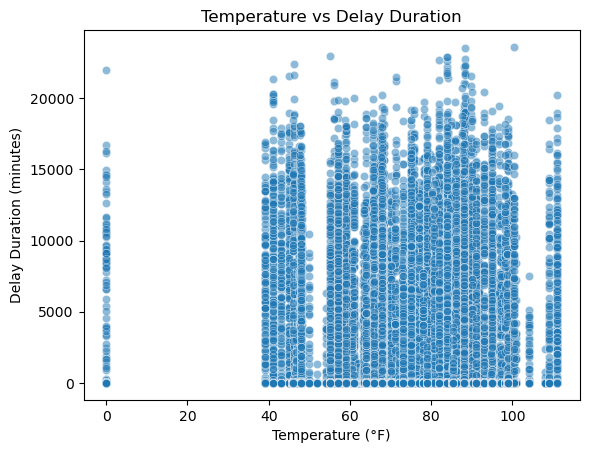

In [443]:
sns.scatterplot(x=merged_df['Temperature Avg'], y=merged_df['departure_delay_minutes'], data = merged_df, alpha=0.5)
plt.title('Temperature vs Delay Duration')
plt.xlabel('Temperature (°F)')
plt.ylabel('Delay Duration (minutes)')
plt.show()


### Boxplot

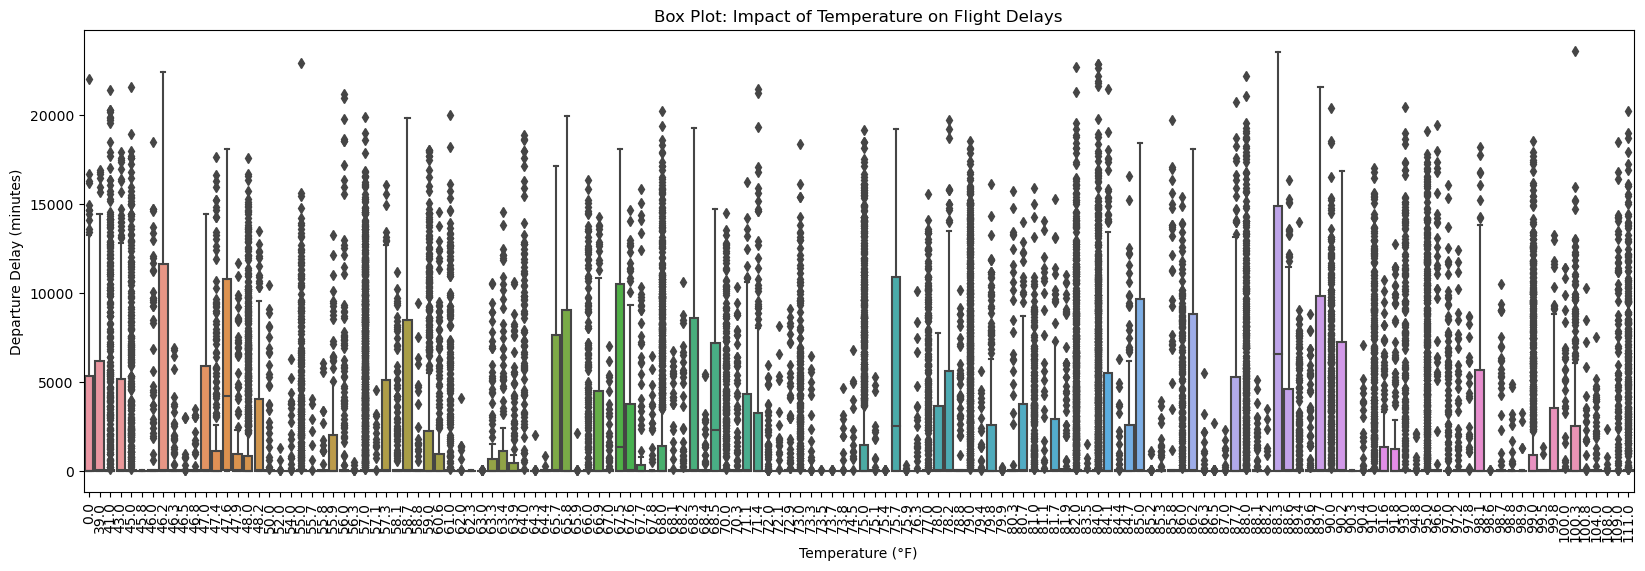

In [444]:
plt.figure(figsize=(20, 6))
sns.boxplot(x="Temperature Avg", y="departure_delay_minutes", data=merged_df)
plt.xlabel("Temperature (°F)")
plt.ylabel("Departure Delay (minutes)")
plt.title("Box Plot: Impact of Temperature on Flight Delays")
plt.xticks(rotation=90)
plt.show()

## 3. Comparision

In [445]:
test_data = pd.read_excel("Binary_Test_File.xlsx")
test_data

,File Name,Flight Number,Type,Status,Departure IATA Code,Departure ICAO Code,Scheduled Time,Arrival IATA Code,Arrival ICAO Code,Arrival Estimated Time
0,20.docx,4361,departure,active,lhe,opla,2024-05-14 00:20:00,dxb,omdb,2024-05-14 00:20:00
1,20.docx,1876,departure,active,lhe,opla,2024-05-07 04:15:00,ruh,oerk,2024-05-07 04:15:00
2,20.docx,6030,departure,active,lhe,opla,2024-05-09 03:10:00,doh,othh,2024-05-09 03:10:00
3,20.docx,739,departure,active,lhe,opla,2024-05-12 02:50:00,jed,oejn,2024-05-12 02:50:00
4,20.docx,3932,departure,active,lhe,opla,2024-05-16 04:35:00,auh,omaa,2024-05-16 04:35:00
...,...,...,...,...,...,...,...,...,...,...
12909,71.docx,615,departure,active,isb,opis,2024-06-23 09:30:00,doh,othh,2024-06-23 09:30:00
12910,71.docx,725,departure,active,isb,opis,2024-06-25 09:50:00,ruh,oerk,2024-06-25 10:45:00
12911,71.docx,211,departure,active,isb,opis,2024-06-22 15:35:00,dxb,omdb,2024-06-22 15:58:00
12912,71.docx,207,departure,active,isb,opis,2024-06-19 17:00:00,khi,opkc,2024-06-19 18:00:00


In [446]:
test_data1 = test_data.copy()
test_data1['departure_scheduled_date'] = test_data1['Scheduled Time'].dt.date          # Extract only the date
test_data1['departure_scheduled_time'] = test_data1['Scheduled Time'].dt.time          # Extract only the time
test_data1['Date'] = test_data1['Scheduled Time'].dt.day            # Extract the day
test_data1['Month'] = test_data1['Scheduled Time'].dt.month        # Extract the month
test_data1['Year'] = test_data1['Scheduled Time'].dt.year          # Extract the year
test_data1['departure_scheduled_hour'] = test_data1['Scheduled Time'].dt.hour          # Extract the hour
test_data1['departure_scheduled_minute'] = test_data1['Scheduled Time'].dt.minute      # Extract the minute
test_data1['departure_scheduled_second'] = test_data1['Scheduled Time'].dt.second      # Extract the second
test_data1

,File Name,Flight Number,Type,Status,Departure IATA Code,Departure ICAO Code,Scheduled Time,Arrival IATA Code,Arrival ICAO Code,Arrival Estimated Time,departure_scheduled_date,departure_scheduled_time,Date,Month,Year,departure_scheduled_hour,departure_scheduled_minute,departure_scheduled_second
0,20.docx,4361,departure,active,lhe,opla,2024-05-14 00:20:00,dxb,omdb,2024-05-14 00:20:00,2024-05-14,00:20:00,14,5,2024,0,20,0
1,20.docx,1876,departure,active,lhe,opla,2024-05-07 04:15:00,ruh,oerk,2024-05-07 04:15:00,2024-05-07,04:15:00,7,5,2024,4,15,0
2,20.docx,6030,departure,active,lhe,opla,2024-05-09 03:10:00,doh,othh,2024-05-09 03:10:00,2024-05-09,03:10:00,9,5,2024,3,10,0
3,20.docx,739,departure,active,lhe,opla,2024-05-12 02:50:00,jed,oejn,2024-05-12 02:50:00,2024-05-12,02:50:00,12,5,2024,2,50,0
4,20.docx,3932,departure,active,lhe,opla,2024-05-16 04:35:00,auh,omaa,2024-05-16 04:35:00,2024-05-16,04:35:00,16,5,2024,4,35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12909,71.docx,615,departure,active,isb,opis,2024-06-23 09:30:00,doh,othh,2024-06-23 09:30:00,2024-06-23,09:30:00,23,6,2024,9,30,0
12910,71.docx,725,departure,active,isb,opis,2024-06-25 09:50:00,ruh,oerk,2024-06-25 10:45:00,2024-06-25,09:50:00,25,6,2024,9,50,0
12911,71.docx,211,departure,active,isb,opis,2024-06-22 15:35:00,dxb,omdb,2024-06-22 15:58:00,2024-06-22,15:35:00,22,6,2024,15,35,0
12912,71.docx,207,departure,active,isb,opis,2024-06-19 17:00:00,khi,opkc,2024-06-19 18:00:00,2024-06-19,17:00:00,19,6,2024,17,0,0


In [447]:
binary_test_df = pd.merge(test_data1, final_df, on=['Date', 'Month', 'Year'])
binary_test_df

,File Name,Flight Number,Type,Status,Departure IATA Code,Departure ICAO Code,Scheduled Time,Arrival IATA Code,Arrival ICAO Code,Arrival Estimated Time,...,Dew Point Min,Humidity Max,Humidity Avg,Humidity Min,Wind Speed Max,Wind Speed Avg,Wind Speed Min,Pressure Max,Pressure Avg,Pressure Min
0,20.docx,4361,departure,active,lhe,opla,2024-05-14 00:20:00,dxb,omdb,2024-05-14 00:20:00,...,64.0,34.9,22.0,48.0,7.8,0.0,12.0,28.9,29.0,28.8
1,20.docx,3836,departure,active,lhe,opla,2024-05-14 09:55:00,doh,othh,2024-05-14 09:55:00,...,64.0,34.9,22.0,48.0,7.8,0.0,12.0,28.9,29.0,28.8
2,20.docx,500,departure,active,lhe,opla,2024-05-14 12:45:00,shj,omsj,2024-05-14 12:45:00,...,64.0,34.9,22.0,48.0,7.8,0.0,12.0,28.9,29.0,28.8
3,20.docx,186,departure,active,lhe,opla,2024-05-14 18:15:00,cmb,vcbi,2024-05-14 18:15:00,...,64.0,34.9,22.0,48.0,7.8,0.0,12.0,28.9,29.0,28.8
4,20.docx,4359,departure,active,lhe,opla,2024-05-14 14:55:00,dxb,omdb,2024-05-14 14:55:00,...,64.0,34.9,22.0,48.0,7.8,0.0,12.0,28.9,29.0,28.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12909,9.docx,715,departure,active,lhe,opla,2023-11-30 06:35:00,ist,ltfm,2023-11-30 06:45:00,...,55.0,73.0,41.0,68.0,0.0,0.0,0.0,29.2,0.0,0.0
12910,9.docx,731,departure,active,lhe,opla,2023-11-30 06:30:00,jed,oejn,2023-11-30 10:30:00,...,55.0,73.0,41.0,68.0,0.0,0.0,0.0,29.2,0.0,0.0
12911,9.docx,412,departure,active,lhe,opla,2023-11-30 23:15:00,shj,omsj,2023-11-30 23:15:00,...,55.0,73.0,41.0,68.0,0.0,0.0,0.0,29.2,0.0,0.0
12912,9.docx,9032,departure,active,lhe,opla,2023-11-30 06:35:00,cmb,vcbi,2023-11-30 06:35:00,...,55.0,73.0,41.0,68.0,0.0,0.0,0.0,29.2,0.0,0.0


In [568]:
binary_test_df.columns

Index(['File Name', 'Flight Number', 'Type', 'Status', 'Departure IATA Code',
       'Departure ICAO Code', 'Scheduled Time', 'Arrival IATA Code',
       'Arrival ICAO Code', 'Arrival Estimated Time',
       'departure_scheduled_date', 'departure_scheduled_time', 'Date', 'Month',
       'Year', 'departure_scheduled_hour', 'departure_scheduled_minute',
       'departure_scheduled_second', 'Precipitation (in)', 'Temperature Max',
       'Temperature Avg', 'Temperature Min', 'Dew Point Max', 'Dew Point Avg',
       'Dew Point Min', 'Humidity Max', 'Humidity Avg', 'Humidity Min',
       'Wind Speed Max', 'Wind Speed Avg', 'Wind Speed Min', 'Pressure Max',
       'Pressure Avg', 'Pressure Min'],
      dtype='object')

### Compare Features Across Training and Test Data

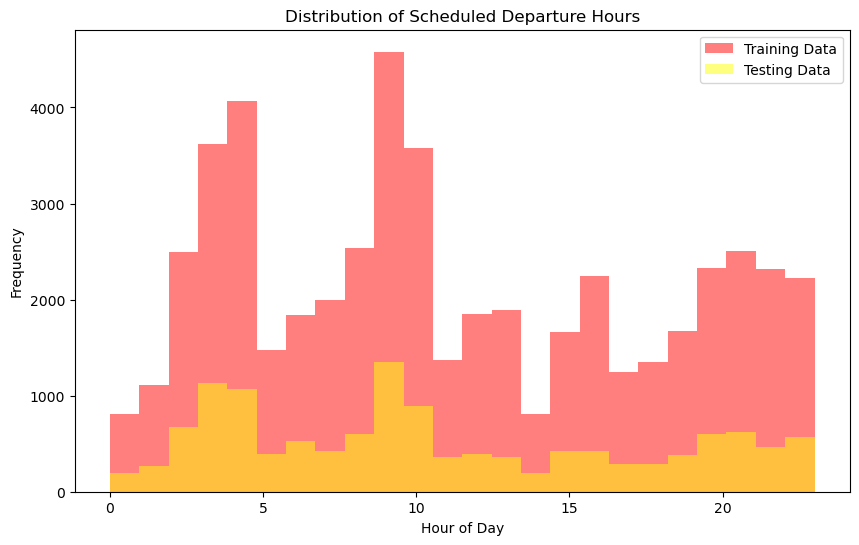

In [448]:
train_hours = pd.to_datetime(merged_df['departure_scheduledTime']).dt.hour
test_hours = pd.to_datetime(test_data1['Scheduled Time']).dt.hour

plt.figure(figsize=(10, 6))
plt.hist(train_hours, bins=24, alpha=0.5, label='Training Data', color='red')
plt.hist(test_hours, bins=24, alpha=0.5, label='Testing Data', color='yellow')
plt.title('Distribution of Scheduled Departure Hours')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Phase 3: Analytical and Predictive Task

In [713]:
columns_to_drop = ['departure_scheduled_date', 'departure_scheduled_time', 'departure_scheduled_hour', 'departure_scheduled_minute', 'departure_scheduled_second', 'Date', 'Month', 'Year']
train_df = merged_df.drop(columns=columns_to_drop)
train_df

,type,status,departure_iataCode,departure_icaoCode,departure_terminal,departure_scheduledTime,departure_estimatedTime,departure_actualTime,departure_estimatedRunway,departure_actualRunway,...,Dew Point Min,Humidity Max,Humidity Avg,Humidity Min,Wind Speed Max,Wind Speed Avg,Wind Speed Min,Pressure Max,Pressure Avg,Pressure Min
0,departure,active,lhe,opla,m,2023-07-20 20:50:00,2023-07-20 20:00:00,2023-07-20 20:15:00.000000000,2023-07-20 20:15:00,2023-07-20 20:15:00,...,79.0,75.0,59.0,89.0,9.5,0.0,13.0,28.9,28.7,28.8
1,departure,active,lhe,opla,m,2023-07-20 11:35:00,2023-07-20 17:15:00,2023-07-26 15:08:34.285714176,2023-11-07 09:19:00,2023-11-07 09:19:00,...,79.0,75.0,59.0,89.0,9.5,0.0,13.0,28.9,28.7,28.8
2,departure,active,lhe,opla,m,2023-07-20 22:20:00,2023-07-20 23:20:00,2023-07-19 22:45:20.000000000,2023-11-07 09:19:00,2023-11-07 09:19:00,...,79.0,75.0,59.0,89.0,9.5,0.0,13.0,28.9,28.7,28.8
3,departure,active,lhe,opla,m,2023-07-20 21:10:00,2023-07-20 21:10:00,2023-07-26 01:34:40.000000000,2023-11-07 09:19:00,2023-11-07 09:19:00,...,79.0,75.0,59.0,89.0,9.5,0.0,13.0,28.9,28.7,28.8
4,departure,active,lhe,opla,m,2023-07-20 09:55:00,2023-07-28 22:02:30,2023-07-20 10:09:00.000000000,2023-07-20 10:09:00,2023-07-20 10:09:00,...,79.0,75.0,59.0,89.0,9.5,0.0,13.0,28.9,28.7,28.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51567,departure,active,khi,opkc,m,2024-07-10 02:30:00,2024-07-10 02:30:00,2024-07-10 02:44:00.000000000,2024-07-10 02:44:00,2024-07-10 02:44:00,...,71.7,89.0,50.0,65.2,40.0,0.0,5.4,28.8,28.8,28.7
51568,departure,active,isb,opis,m,2024-07-10 03:10:00,2024-07-10 03:10:00,2024-07-10 03:28:00.000000000,2024-07-10 03:28:00,2024-07-10 03:28:00,...,71.7,89.0,50.0,65.2,40.0,0.0,5.4,28.8,28.8,28.7
51569,departure,active,isb,opis,m,2024-07-10 02:10:00,2024-07-10 04:25:00,2024-07-07 06:25:40.000000000,2023-11-07 09:19:00,2023-11-07 09:19:00,...,71.7,89.0,50.0,65.2,40.0,0.0,5.4,28.8,28.8,28.7
51570,departure,active,isb,opis,m,2024-07-10 04:35:00,2024-07-10 05:12:00,2024-07-07 15:33:30.000000000,2023-11-07 09:19:00,2023-11-07 09:19:00,...,71.7,89.0,50.0,65.2,40.0,0.0,5.4,28.8,28.8,28.7


In [714]:
columns_to_drop = ['departure_scheduled_date', 'departure_scheduled_time', 'departure_scheduled_hour', 'departure_scheduled_minute', 'departure_scheduled_second', 'Date', 'Month', 'Year']
test_df = binary_test_df.drop(columns=columns_to_drop)
test_df

,File Name,Flight Number,Type,Status,Departure IATA Code,Departure ICAO Code,Scheduled Time,Arrival IATA Code,Arrival ICAO Code,Arrival Estimated Time,...,Dew Point Min,Humidity Max,Humidity Avg,Humidity Min,Wind Speed Max,Wind Speed Avg,Wind Speed Min,Pressure Max,Pressure Avg,Pressure Min
0,20.docx,4361,departure,active,lhe,opla,2024-05-14 00:20:00,dxb,omdb,2024-05-14 00:20:00,...,64.0,34.9,22.0,48.0,7.8,0.0,12.0,28.9,29.0,28.8
1,20.docx,3836,departure,active,lhe,opla,2024-05-14 09:55:00,doh,othh,2024-05-14 09:55:00,...,64.0,34.9,22.0,48.0,7.8,0.0,12.0,28.9,29.0,28.8
2,20.docx,500,departure,active,lhe,opla,2024-05-14 12:45:00,shj,omsj,2024-05-14 12:45:00,...,64.0,34.9,22.0,48.0,7.8,0.0,12.0,28.9,29.0,28.8
3,20.docx,186,departure,active,lhe,opla,2024-05-14 18:15:00,cmb,vcbi,2024-05-14 18:15:00,...,64.0,34.9,22.0,48.0,7.8,0.0,12.0,28.9,29.0,28.8
4,20.docx,4359,departure,active,lhe,opla,2024-05-14 14:55:00,dxb,omdb,2024-05-14 14:55:00,...,64.0,34.9,22.0,48.0,7.8,0.0,12.0,28.9,29.0,28.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12909,9.docx,715,departure,active,lhe,opla,2023-11-30 06:35:00,ist,ltfm,2023-11-30 06:45:00,...,55.0,73.0,41.0,68.0,0.0,0.0,0.0,29.2,0.0,0.0
12910,9.docx,731,departure,active,lhe,opla,2023-11-30 06:30:00,jed,oejn,2023-11-30 10:30:00,...,55.0,73.0,41.0,68.0,0.0,0.0,0.0,29.2,0.0,0.0
12911,9.docx,412,departure,active,lhe,opla,2023-11-30 23:15:00,shj,omsj,2023-11-30 23:15:00,...,55.0,73.0,41.0,68.0,0.0,0.0,0.0,29.2,0.0,0.0
12912,9.docx,9032,departure,active,lhe,opla,2023-11-30 06:35:00,cmb,vcbi,2023-11-30 06:35:00,...,55.0,73.0,41.0,68.0,0.0,0.0,0.0,29.2,0.0,0.0


## Binary Classification

In [715]:
train_df['binary_delay'] = train_df['departure_delay_minutes'].apply(lambda x: 0 if x == 0 else 1)

In [716]:
train_df1 = {
    "Type": train_df['type'],
    "Status": train_df['status'],
    "Departure IATA Code": train_df["departure_iataCode"],
    "Departure ICAO Code": train_df["departure_icaoCode"],
    "Scheduled Time": train_df["departure_scheduledTime"],
    "Arrival IATA Code": train_df["arrival_iataCode"],
    "Arrival ICAO Code": train_df["arrival_icaoCode"],
    "Arrival Estimated Time": train_df["arrival_estimatedTime"],
    "binary_delay": train_df["binary_delay"]
}

In [717]:
train_df1 = pd.DataFrame(train_df1)

In [718]:
train_df1['Date'] = train_df1['Scheduled Time'].dt.day            # Extract the day
train_df1['Month'] = train_df1['Scheduled Time'].dt.month        # Extract the month
train_df1['Year'] = train_df1['Scheduled Time'].dt.year          # Extract the year
train_df1

,Type,Status,Departure IATA Code,Departure ICAO Code,Scheduled Time,Arrival IATA Code,Arrival ICAO Code,Arrival Estimated Time,binary_delay,Date,Month,Year
0,departure,active,lhe,opla,2023-07-20 20:50:00,ruh,oerk,2023-07-20t21:54:00.000,0,20,7,2023
1,departure,active,lhe,opla,2023-07-20 11:35:00,dxb,omdb,2024-06-07t11:06:00.000,1,20,7,2023
2,departure,active,lhe,opla,2023-07-20 22:20:00,dmm,oedf,2024-06-07t11:06:00.000,0,20,7,2023
3,departure,active,lhe,opla,2023-07-20 21:10:00,doh,othh,2024-06-07t11:06:00.000,1,20,7,2023
4,departure,active,lhe,opla,2023-07-20 09:55:00,doh,othh,2023-07-20t11:10:00.000,1,20,7,2023
...,...,...,...,...,...,...,...,...,...,...,...,...
51567,departure,active,khi,opkc,2024-07-10 02:30:00,dxb,omdb,2024-07-10t03:28:00.000,1,10,7,2024
51568,departure,active,isb,opis,2024-07-10 03:10:00,med,oema,2024-07-10t05:57:00.000,1,10,7,2024
51569,departure,active,isb,opis,2024-07-10 02:10:00,dxb,omdb,2024-06-07t11:06:00.000,0,10,7,2024
51570,departure,active,isb,opis,2024-07-10 04:35:00,auh,omaa,2024-06-07t11:06:00.000,0,10,7,2024


In [719]:
train_df2 = pd.merge(train_df1, final_df, on=['Date', 'Month', 'Year'])
train_df2

,Type,Status,Departure IATA Code,Departure ICAO Code,Scheduled Time,Arrival IATA Code,Arrival ICAO Code,Arrival Estimated Time,binary_delay,Date,...,Dew Point Min,Humidity Max,Humidity Avg,Humidity Min,Wind Speed Max,Wind Speed Avg,Wind Speed Min,Pressure Max,Pressure Avg,Pressure Min
0,departure,active,lhe,opla,2023-07-20 20:50:00,ruh,oerk,2023-07-20t21:54:00.000,0,20,...,79.0,75.0,59.0,89.0,9.5,0.0,13.0,28.9,28.7,28.8
1,departure,active,lhe,opla,2023-07-20 11:35:00,dxb,omdb,2024-06-07t11:06:00.000,1,20,...,79.0,75.0,59.0,89.0,9.5,0.0,13.0,28.9,28.7,28.8
2,departure,active,lhe,opla,2023-07-20 22:20:00,dmm,oedf,2024-06-07t11:06:00.000,0,20,...,79.0,75.0,59.0,89.0,9.5,0.0,13.0,28.9,28.7,28.8
3,departure,active,lhe,opla,2023-07-20 21:10:00,doh,othh,2024-06-07t11:06:00.000,1,20,...,79.0,75.0,59.0,89.0,9.5,0.0,13.0,28.9,28.7,28.8
4,departure,active,lhe,opla,2023-07-20 09:55:00,doh,othh,2023-07-20t11:10:00.000,1,20,...,79.0,75.0,59.0,89.0,9.5,0.0,13.0,28.9,28.7,28.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51567,departure,active,khi,opkc,2024-07-10 02:30:00,dxb,omdb,2024-07-10t03:28:00.000,1,10,...,71.7,89.0,50.0,65.2,40.0,0.0,5.4,28.8,28.8,28.7
51568,departure,active,isb,opis,2024-07-10 03:10:00,med,oema,2024-07-10t05:57:00.000,1,10,...,71.7,89.0,50.0,65.2,40.0,0.0,5.4,28.8,28.8,28.7
51569,departure,active,isb,opis,2024-07-10 02:10:00,dxb,omdb,2024-06-07t11:06:00.000,0,10,...,71.7,89.0,50.0,65.2,40.0,0.0,5.4,28.8,28.8,28.7
51570,departure,active,isb,opis,2024-07-10 04:35:00,auh,omaa,2024-06-07t11:06:00.000,0,10,...,71.7,89.0,50.0,65.2,40.0,0.0,5.4,28.8,28.8,28.7


In [720]:
columns_to_drop = ['Date', 'Month', 'Year']
train_df2 = train_df2.drop(columns=columns_to_drop)
train_df2

,Type,Status,Departure IATA Code,Departure ICAO Code,Scheduled Time,Arrival IATA Code,Arrival ICAO Code,Arrival Estimated Time,binary_delay,Precipitation (in),...,Dew Point Min,Humidity Max,Humidity Avg,Humidity Min,Wind Speed Max,Wind Speed Avg,Wind Speed Min,Pressure Max,Pressure Avg,Pressure Min
0,departure,active,lhe,opla,2023-07-20 20:50:00,ruh,oerk,2023-07-20t21:54:00.000,0,0.0,...,79.0,75.0,59.0,89.0,9.5,0.0,13.0,28.9,28.7,28.8
1,departure,active,lhe,opla,2023-07-20 11:35:00,dxb,omdb,2024-06-07t11:06:00.000,1,0.0,...,79.0,75.0,59.0,89.0,9.5,0.0,13.0,28.9,28.7,28.8
2,departure,active,lhe,opla,2023-07-20 22:20:00,dmm,oedf,2024-06-07t11:06:00.000,0,0.0,...,79.0,75.0,59.0,89.0,9.5,0.0,13.0,28.9,28.7,28.8
3,departure,active,lhe,opla,2023-07-20 21:10:00,doh,othh,2024-06-07t11:06:00.000,1,0.0,...,79.0,75.0,59.0,89.0,9.5,0.0,13.0,28.9,28.7,28.8
4,departure,active,lhe,opla,2023-07-20 09:55:00,doh,othh,2023-07-20t11:10:00.000,1,0.0,...,79.0,75.0,59.0,89.0,9.5,0.0,13.0,28.9,28.7,28.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51567,departure,active,khi,opkc,2024-07-10 02:30:00,dxb,omdb,2024-07-10t03:28:00.000,1,0.0,...,71.7,89.0,50.0,65.2,40.0,0.0,5.4,28.8,28.8,28.7
51568,departure,active,isb,opis,2024-07-10 03:10:00,med,oema,2024-07-10t05:57:00.000,1,0.0,...,71.7,89.0,50.0,65.2,40.0,0.0,5.4,28.8,28.8,28.7
51569,departure,active,isb,opis,2024-07-10 02:10:00,dxb,omdb,2024-06-07t11:06:00.000,0,0.0,...,71.7,89.0,50.0,65.2,40.0,0.0,5.4,28.8,28.8,28.7
51570,departure,active,isb,opis,2024-07-10 04:35:00,auh,omaa,2024-06-07t11:06:00.000,0,0.0,...,71.7,89.0,50.0,65.2,40.0,0.0,5.4,28.8,28.8,28.7


In [721]:
X = train_df2.drop(['binary_delay'], axis=1)  # Exclude target variable
y = train_df2['binary_delay']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [722]:
X

,Type,Status,Departure IATA Code,Departure ICAO Code,Scheduled Time,Arrival IATA Code,Arrival ICAO Code,Arrival Estimated Time,Precipitation (in),Temperature Max,...,Dew Point Min,Humidity Max,Humidity Avg,Humidity Min,Wind Speed Max,Wind Speed Avg,Wind Speed Min,Pressure Max,Pressure Avg,Pressure Min
0,departure,active,lhe,opla,2023-07-20 20:50:00,ruh,oerk,2023-07-20t21:54:00.000,0.0,84.3,...,79.0,75.0,59.0,89.0,9.5,0.0,13.0,28.9,28.7,28.8
1,departure,active,lhe,opla,2023-07-20 11:35:00,dxb,omdb,2024-06-07t11:06:00.000,0.0,84.3,...,79.0,75.0,59.0,89.0,9.5,0.0,13.0,28.9,28.7,28.8
2,departure,active,lhe,opla,2023-07-20 22:20:00,dmm,oedf,2024-06-07t11:06:00.000,0.0,84.3,...,79.0,75.0,59.0,89.0,9.5,0.0,13.0,28.9,28.7,28.8
3,departure,active,lhe,opla,2023-07-20 21:10:00,doh,othh,2024-06-07t11:06:00.000,0.0,84.3,...,79.0,75.0,59.0,89.0,9.5,0.0,13.0,28.9,28.7,28.8
4,departure,active,lhe,opla,2023-07-20 09:55:00,doh,othh,2023-07-20t11:10:00.000,0.0,84.3,...,79.0,75.0,59.0,89.0,9.5,0.0,13.0,28.9,28.7,28.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51567,departure,active,khi,opkc,2024-07-10 02:30:00,dxb,omdb,2024-07-10t03:28:00.000,0.0,90.0,...,71.7,89.0,50.0,65.2,40.0,0.0,5.4,28.8,28.8,28.7
51568,departure,active,isb,opis,2024-07-10 03:10:00,med,oema,2024-07-10t05:57:00.000,0.0,90.0,...,71.7,89.0,50.0,65.2,40.0,0.0,5.4,28.8,28.8,28.7
51569,departure,active,isb,opis,2024-07-10 02:10:00,dxb,omdb,2024-06-07t11:06:00.000,0.0,90.0,...,71.7,89.0,50.0,65.2,40.0,0.0,5.4,28.8,28.8,28.7
51570,departure,active,isb,opis,2024-07-10 04:35:00,auh,omaa,2024-06-07t11:06:00.000,0.0,90.0,...,71.7,89.0,50.0,65.2,40.0,0.0,5.4,28.8,28.8,28.7


In [723]:
for col in X_train.select_dtypes(include=['datetime64']).columns:
    X_train[f'{col}_year'] = X_train[col].dt.year
    X_train[f'{col}_month'] = X_train[col].dt.month
    X_train[f'{col}_day'] = X_train[col].dt.day
    X_train.drop(columns=[col], inplace=True)
    X_test[f'{col}_year'] = X_test[col].dt.year
    X_test[f'{col}_month'] = X_test[col].dt.month
    X_test[f'{col}_day'] = X_test[col].dt.day
    X_test.drop(columns=[col], inplace=True)

In [724]:
X_train

,Type,Status,Departure IATA Code,Departure ICAO Code,Arrival IATA Code,Arrival ICAO Code,Arrival Estimated Time,Precipitation (in),Temperature Max,Temperature Avg,...,Humidity Min,Wind Speed Max,Wind Speed Avg,Wind Speed Min,Pressure Max,Pressure Avg,Pressure Min,Scheduled Time_year,Scheduled Time_month,Scheduled Time_day
21538,departure,active,isb,opis,jed,oejn,2024-06-07t11:06:00.000,0.0,62.7,48.0,...,93.0,3.5,0.0,17.0,29.3,29.2,29.3,2023,12,2
50712,departure,active,lhe,opla,dxb,omdb,2024-07-01t14:37:00.000,0.0,95.0,75.0,...,69.8,35.0,0.0,8.6,28.7,27.9,28.9,2024,7,1
43356,departure,active,isb,opis,ist,ltfm,2024-05-05t09:21:00.000,0.0,79.7,77.0,...,59.0,5.3,3.0,14.0,28.9,28.9,28.9,2024,5,5
42116,departure,active,isb,opis,lhr,egll,2024-06-07t11:06:00.000,0.0,84.0,85.8,...,18.0,16.0,8.3,0.0,29.0,29.0,28.8,2024,5,1
12486,departure,active,isb,opis,auh,omaa,2024-06-07t11:06:00.000,0.0,88.4,85.0,...,68.9,5.9,6.1,3.4,28.9,28.9,29.0,2023,9,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,departure,active,khi,opkc,lhe,opla,2023-09-22t15:48:00.000,0.0,93.0,84.0,...,89.0,9.0,23.0,6.0,28.9,29.0,29.0,2023,9,22
44732,departure,active,isb,opis,ist,ltfm,2024-06-01t09:17:00.000,0.0,113.0,111.0,...,78.0,16.0,21.0,12.0,28.8,28.8,28.8,2024,6,1
38158,departure,active,khi,opkc,dxb,omdb,2024-04-08t00:54:00.000,0.0,91.0,82.0,...,73.0,14.0,29.0,23.0,29.1,29.2,29.0,2024,4,7
860,departure,active,lhe,opla,doh,othh,2023-07-16t04:44:00.000,0.0,84.0,84.1,...,59.0,25.0,10.4,0.0,28.9,28.8,28.8,2023,7,16


In [725]:
for col in X_train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.fit_transform(X_test[col])

In [726]:
X_train = X_train.fillna(0)  # Fill missing values with 0

In [727]:
X_test = X_test.fillna(0)  # Fill missing values with 0

In [728]:
model = RandomForestClassifier()

In [729]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [730]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 154 2739]
 [ 132 7290]]
              precision    recall  f1-score   support

           0       0.54      0.05      0.10      2893
           1       0.73      0.98      0.84      7422

    accuracy                           0.72     10315
   macro avg       0.63      0.52      0.47     10315
weighted avg       0.67      0.72      0.63     10315



In [731]:
for col in test_df.select_dtypes(include=['datetime64']).columns:
    if col == "Scheduled Time":
        test_df[f'{col}_year'] = test_df[col].dt.year
        test_df[f'{col}_month'] = test_df[col].dt.month
        test_df[f'{col}_day'] = test_df[col].dt.day
#     test_df.drop(columns=[col], inplace=True)

In [732]:
test_df.columns

Index(['File Name', 'Flight Number', 'Type', 'Status', 'Departure IATA Code',
       'Departure ICAO Code', 'Scheduled Time', 'Arrival IATA Code',
       'Arrival ICAO Code', 'Arrival Estimated Time', 'Precipitation (in)',
       'Temperature Max', 'Temperature Avg', 'Temperature Min',
       'Dew Point Max', 'Dew Point Avg', 'Dew Point Min', 'Humidity Max',
       'Humidity Avg', 'Humidity Min', 'Wind Speed Max', 'Wind Speed Avg',
       'Wind Speed Min', 'Pressure Max', 'Pressure Avg', 'Pressure Min',
       'Scheduled Time_year', 'Scheduled Time_month', 'Scheduled Time_day'],
      dtype='object')

In [733]:
columns_to_drop = ['Scheduled Time']
test_df = test_df.drop(columns=columns_to_drop)
test_df

,File Name,Flight Number,Type,Status,Departure IATA Code,Departure ICAO Code,Arrival IATA Code,Arrival ICAO Code,Arrival Estimated Time,Precipitation (in),...,Humidity Min,Wind Speed Max,Wind Speed Avg,Wind Speed Min,Pressure Max,Pressure Avg,Pressure Min,Scheduled Time_year,Scheduled Time_month,Scheduled Time_day
0,20.docx,4361,departure,active,lhe,opla,dxb,omdb,2024-05-14 00:20:00,0.0,...,48.0,7.8,0.0,12.0,28.9,29.0,28.8,2024,5,14
1,20.docx,3836,departure,active,lhe,opla,doh,othh,2024-05-14 09:55:00,0.0,...,48.0,7.8,0.0,12.0,28.9,29.0,28.8,2024,5,14
2,20.docx,500,departure,active,lhe,opla,shj,omsj,2024-05-14 12:45:00,0.0,...,48.0,7.8,0.0,12.0,28.9,29.0,28.8,2024,5,14
3,20.docx,186,departure,active,lhe,opla,cmb,vcbi,2024-05-14 18:15:00,0.0,...,48.0,7.8,0.0,12.0,28.9,29.0,28.8,2024,5,14
4,20.docx,4359,departure,active,lhe,opla,dxb,omdb,2024-05-14 14:55:00,0.0,...,48.0,7.8,0.0,12.0,28.9,29.0,28.8,2024,5,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12909,9.docx,715,departure,active,lhe,opla,ist,ltfm,2023-11-30 06:45:00,0.0,...,68.0,0.0,0.0,0.0,29.2,0.0,0.0,2023,11,30
12910,9.docx,731,departure,active,lhe,opla,jed,oejn,2023-11-30 10:30:00,0.0,...,68.0,0.0,0.0,0.0,29.2,0.0,0.0,2023,11,30
12911,9.docx,412,departure,active,lhe,opla,shj,omsj,2023-11-30 23:15:00,0.0,...,68.0,0.0,0.0,0.0,29.2,0.0,0.0,2023,11,30
12912,9.docx,9032,departure,active,lhe,opla,cmb,vcbi,2023-11-30 06:35:00,0.0,...,68.0,0.0,0.0,0.0,29.2,0.0,0.0,2023,11,30


In [734]:
for col in test_df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    test_df[col] = le.fit_transform(test_df[col])

In [735]:
if 'Arrival Estimated Time' in test_df.columns:
    test_df['Arrival Estimated Time'] = pd.to_datetime(test_df['Arrival Estimated Time'])


In [736]:
test_df.dtypes

File Name                          int32
Flight Number                      int64
Type                               int32
Status                             int32
Departure IATA Code                int32
Departure ICAO Code                int32
Arrival IATA Code                  int32
Arrival ICAO Code                  int32
Arrival Estimated Time    datetime64[ns]
Precipitation (in)               float64
Temperature Max                  float64
Temperature Avg                  float64
Temperature Min                  float64
Dew Point Max                    float64
Dew Point Avg                    float64
Dew Point Min                    float64
Humidity Max                     float64
Humidity Avg                     float64
Humidity Min                     float64
Wind Speed Max                   float64
Wind Speed Avg                   float64
Wind Speed Min                   float64
Pressure Max                     float64
Pressure Avg                     float64
Pressure Min    

In [739]:
columns_to_drop = ['File Name', 'Flight Number']
test_df = test_df.drop(columns=columns_to_drop)
test_df

,Type,Status,Departure IATA Code,Departure ICAO Code,Arrival IATA Code,Arrival ICAO Code,Arrival Estimated Time,Precipitation (in),Temperature Max,Temperature Avg,...,Humidity Min,Wind Speed Max,Wind Speed Avg,Wind Speed Min,Pressure Max,Pressure Avg,Pressure Min,Scheduled Time_year,Scheduled Time_month,Scheduled Time_day
0,0,0,2,2,18,26,2024-05-14 00:20:00,0.0,87.7,79.0,...,48.0,7.8,0.0,12.0,28.9,29.0,28.8,2024,5,14
1,0,0,2,2,17,52,2024-05-14 09:55:00,0.0,87.7,79.0,...,48.0,7.8,0.0,12.0,28.9,29.0,28.8,2024,5,14
2,0,0,2,2,56,28,2024-05-14 12:45:00,0.0,87.7,79.0,...,48.0,7.8,0.0,12.0,28.9,29.0,28.8,2024,5,14
3,0,0,2,2,13,57,2024-05-14 18:15:00,0.0,87.7,79.0,...,48.0,7.8,0.0,12.0,28.9,29.0,28.8,2024,5,14
4,0,0,2,2,18,26,2024-05-14 14:55:00,0.0,87.7,79.0,...,48.0,7.8,0.0,12.0,28.9,29.0,28.8,2024,5,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12909,0,0,2,2,28,12,2023-11-30 06:45:00,0.0,59.0,55.0,...,68.0,0.0,0.0,0.0,29.2,0.0,0.0,2023,11,30
12910,0,0,2,2,29,19,2023-11-30 10:30:00,0.0,59.0,55.0,...,68.0,0.0,0.0,0.0,29.2,0.0,0.0,2023,11,30
12911,0,0,2,2,56,28,2023-11-30 23:15:00,0.0,59.0,55.0,...,68.0,0.0,0.0,0.0,29.2,0.0,0.0,2023,11,30
12912,0,0,2,2,13,57,2023-11-30 06:35:00,0.0,59.0,55.0,...,68.0,0.0,0.0,0.0,29.2,0.0,0.0,2023,11,30


In [498]:
imputer = SimpleImputer(strategy='mean')

pipeline = Pipeline([
    ('imputer', imputer),
    ('model', RandomForestRegressor(n_estimators=100))
])

numeric_features = X.select_dtypes(include=[np.number])

cv_scores = cross_val_score(pipeline, numeric_features, y, cv=5, scoring='r2')  # Changed scoring to 'r2'
cv_mean_accuracy = cv_scores.mean()

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\USER 1\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USER 1\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\USER 1\AppData\Local\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 416, in fit
    Xt = self._fit(X, y, **fit_params_steps)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\USER 1\AppData\Local\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 370, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\USER 1\AppData\Local\anaconda3\Lib\site-packages\joblib\memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\USER 1\AppData\Local\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 950, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\USER 1\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\_set_output.py", line 140, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\USER 1\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py", line 918, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\USER 1\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\USER 1\AppData\Local\anaconda3\Lib\site-packages\sklearn\impute\_base.py", line 366, in fit
    X = self._validate_input(X, in_fit=True)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\USER 1\AppData\Local\anaconda3\Lib\site-packages\sklearn\impute\_base.py", line 329, in _validate_input
    raise ve
  File "C:\Users\USER 1\AppData\Local\anaconda3\Lib\site-packages\sklearn\impute\_base.py", line 312, in _validate_input
    X = self._validate_data(
        ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\USER 1\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py", line 604, in _validate_data
    out = check_array(X, input_name="X", **check_params)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\USER 1\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 797, in check_array
    dtype_orig = np.result_type(*dtypes_orig)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<__array_function__ internals>", line 200, in result_type
ValueError: at least one array or dtype is required


In [334]:
print("Cross-Validation Accuracy Scores:", -cv_scores)
print("Mean Cross-Validation Accuracy:", -cv_mean_accuracy)

Cross-Validation Accuracy Scores: [0.03750454 0.03367924 0.02981936 0.06426991 0.09169629]
Mean Cross-Validation Accuracy: 0.05139386791992786


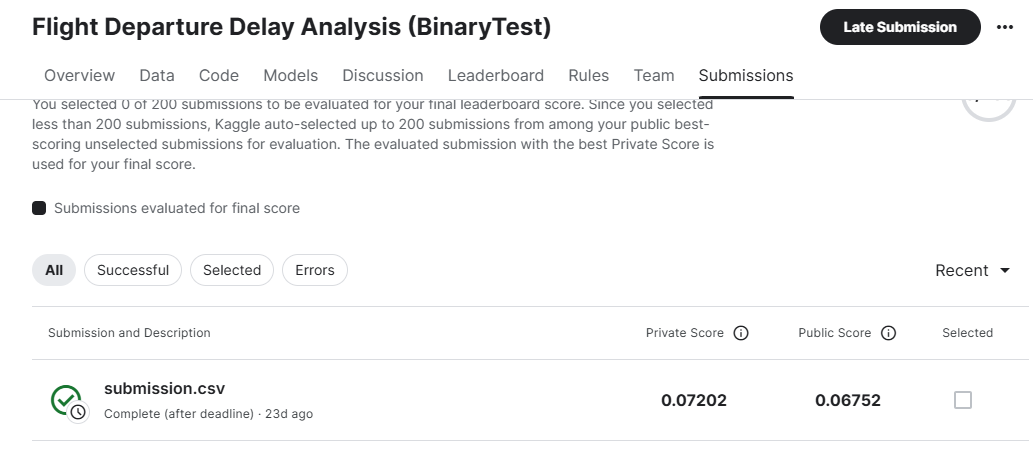

## Multi Class Classification

In [755]:
def categorize_delay(delay):
    if delay == 0:
        return 0
    elif delay < 45:
        return 1
    elif delay <= 175:
        return 2
    else:
        return 3

In [756]:
train_df = train_df.drop(columns=['binary_delay'], axis=1)
train_df

,type,status,departure_iataCode,departure_icaoCode,departure_terminal,departure_scheduledTime,departure_estimatedTime,departure_actualTime,departure_estimatedRunway,departure_actualRunway,...,Dew Point Min,Humidity Max,Humidity Avg,Humidity Min,Wind Speed Max,Wind Speed Avg,Wind Speed Min,Pressure Max,Pressure Avg,Pressure Min
0,departure,active,lhe,opla,m,2023-07-20 20:50:00,2023-07-20 20:00:00,2023-07-20 20:15:00.000000000,2023-07-20 20:15:00,2023-07-20 20:15:00,...,79.0,75.0,59.0,89.0,9.5,0.0,13.0,28.9,28.7,28.8
1,departure,active,lhe,opla,m,2023-07-20 11:35:00,2023-07-20 17:15:00,2023-07-26 15:08:34.285714176,2023-11-07 09:19:00,2023-11-07 09:19:00,...,79.0,75.0,59.0,89.0,9.5,0.0,13.0,28.9,28.7,28.8
2,departure,active,lhe,opla,m,2023-07-20 22:20:00,2023-07-20 23:20:00,2023-07-19 22:45:20.000000000,2023-11-07 09:19:00,2023-11-07 09:19:00,...,79.0,75.0,59.0,89.0,9.5,0.0,13.0,28.9,28.7,28.8
3,departure,active,lhe,opla,m,2023-07-20 21:10:00,2023-07-20 21:10:00,2023-07-26 01:34:40.000000000,2023-11-07 09:19:00,2023-11-07 09:19:00,...,79.0,75.0,59.0,89.0,9.5,0.0,13.0,28.9,28.7,28.8
4,departure,active,lhe,opla,m,2023-07-20 09:55:00,2023-07-28 22:02:30,2023-07-20 10:09:00.000000000,2023-07-20 10:09:00,2023-07-20 10:09:00,...,79.0,75.0,59.0,89.0,9.5,0.0,13.0,28.9,28.7,28.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51567,departure,active,khi,opkc,m,2024-07-10 02:30:00,2024-07-10 02:30:00,2024-07-10 02:44:00.000000000,2024-07-10 02:44:00,2024-07-10 02:44:00,...,71.7,89.0,50.0,65.2,40.0,0.0,5.4,28.8,28.8,28.7
51568,departure,active,isb,opis,m,2024-07-10 03:10:00,2024-07-10 03:10:00,2024-07-10 03:28:00.000000000,2024-07-10 03:28:00,2024-07-10 03:28:00,...,71.7,89.0,50.0,65.2,40.0,0.0,5.4,28.8,28.8,28.7
51569,departure,active,isb,opis,m,2024-07-10 02:10:00,2024-07-10 04:25:00,2024-07-07 06:25:40.000000000,2023-11-07 09:19:00,2023-11-07 09:19:00,...,71.7,89.0,50.0,65.2,40.0,0.0,5.4,28.8,28.8,28.7
51570,departure,active,isb,opis,m,2024-07-10 04:35:00,2024-07-10 05:12:00,2024-07-07 15:33:30.000000000,2023-11-07 09:19:00,2023-11-07 09:19:00,...,71.7,89.0,50.0,65.2,40.0,0.0,5.4,28.8,28.8,28.7


In [757]:
train_df['delay_category'] = train_df['departure_delay_minutes'].apply(categorize_delay)
train_df

,type,status,departure_iataCode,departure_icaoCode,departure_terminal,departure_scheduledTime,departure_estimatedTime,departure_actualTime,departure_estimatedRunway,departure_actualRunway,...,Humidity Max,Humidity Avg,Humidity Min,Wind Speed Max,Wind Speed Avg,Wind Speed Min,Pressure Max,Pressure Avg,Pressure Min,delay_category
0,departure,active,lhe,opla,m,2023-07-20 20:50:00,2023-07-20 20:00:00,2023-07-20 20:15:00.000000000,2023-07-20 20:15:00,2023-07-20 20:15:00,...,75.0,59.0,89.0,9.5,0.0,13.0,28.9,28.7,28.8,0
1,departure,active,lhe,opla,m,2023-07-20 11:35:00,2023-07-20 17:15:00,2023-07-26 15:08:34.285714176,2023-11-07 09:19:00,2023-11-07 09:19:00,...,75.0,59.0,89.0,9.5,0.0,13.0,28.9,28.7,28.8,3
2,departure,active,lhe,opla,m,2023-07-20 22:20:00,2023-07-20 23:20:00,2023-07-19 22:45:20.000000000,2023-11-07 09:19:00,2023-11-07 09:19:00,...,75.0,59.0,89.0,9.5,0.0,13.0,28.9,28.7,28.8,0
3,departure,active,lhe,opla,m,2023-07-20 21:10:00,2023-07-20 21:10:00,2023-07-26 01:34:40.000000000,2023-11-07 09:19:00,2023-11-07 09:19:00,...,75.0,59.0,89.0,9.5,0.0,13.0,28.9,28.7,28.8,3
4,departure,active,lhe,opla,m,2023-07-20 09:55:00,2023-07-28 22:02:30,2023-07-20 10:09:00.000000000,2023-07-20 10:09:00,2023-07-20 10:09:00,...,75.0,59.0,89.0,9.5,0.0,13.0,28.9,28.7,28.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51567,departure,active,khi,opkc,m,2024-07-10 02:30:00,2024-07-10 02:30:00,2024-07-10 02:44:00.000000000,2024-07-10 02:44:00,2024-07-10 02:44:00,...,89.0,50.0,65.2,40.0,0.0,5.4,28.8,28.8,28.7,1
51568,departure,active,isb,opis,m,2024-07-10 03:10:00,2024-07-10 03:10:00,2024-07-10 03:28:00.000000000,2024-07-10 03:28:00,2024-07-10 03:28:00,...,89.0,50.0,65.2,40.0,0.0,5.4,28.8,28.8,28.7,1
51569,departure,active,isb,opis,m,2024-07-10 02:10:00,2024-07-10 04:25:00,2024-07-07 06:25:40.000000000,2023-11-07 09:19:00,2023-11-07 09:19:00,...,89.0,50.0,65.2,40.0,0.0,5.4,28.8,28.8,28.7,0
51570,departure,active,isb,opis,m,2024-07-10 04:35:00,2024-07-10 05:12:00,2024-07-07 15:33:30.000000000,2023-11-07 09:19:00,2023-11-07 09:19:00,...,89.0,50.0,65.2,40.0,0.0,5.4,28.8,28.8,28.7,0


In [760]:
train_df1 = {
    "Type": train_df['type'],
    "Status": train_df['status'],
    "Departure IATA Code": train_df["departure_iataCode"],
    "Departure ICAO Code": train_df["departure_icaoCode"],
    "Scheduled Time": train_df["departure_scheduledTime"],
    "Arrival IATA Code": train_df["arrival_iataCode"],
    "Arrival ICAO Code": train_df["arrival_icaoCode"],
    "Arrival Estimated Time": train_df["arrival_estimatedTime"],
    "delay": train_df["delay_category"]
}

In [761]:
train_df2 = pd.DataFrame(train_df1)

In [765]:
train_df2['Date'] = train_df2['Scheduled Time'].dt.day            # Extract the day
train_df2['Month'] = train_df2['Scheduled Time'].dt.month        # Extract the month
train_df2['Year'] = train_df2['Scheduled Time'].dt.year          # Extract the year
train_df2

,Type,Status,Departure IATA Code,Departure ICAO Code,Scheduled Time,Arrival IATA Code,Arrival ICAO Code,Arrival Estimated Time,delay,Date,Month,Year
0,departure,active,lhe,opla,2023-07-20 20:50:00,ruh,oerk,2023-07-20t21:54:00.000,0,20,7,2023
1,departure,active,lhe,opla,2023-07-20 11:35:00,dxb,omdb,2024-06-07t11:06:00.000,3,20,7,2023
2,departure,active,lhe,opla,2023-07-20 22:20:00,dmm,oedf,2024-06-07t11:06:00.000,0,20,7,2023
3,departure,active,lhe,opla,2023-07-20 21:10:00,doh,othh,2024-06-07t11:06:00.000,3,20,7,2023
4,departure,active,lhe,opla,2023-07-20 09:55:00,doh,othh,2023-07-20t11:10:00.000,1,20,7,2023
...,...,...,...,...,...,...,...,...,...,...,...,...
51567,departure,active,khi,opkc,2024-07-10 02:30:00,dxb,omdb,2024-07-10t03:28:00.000,1,10,7,2024
51568,departure,active,isb,opis,2024-07-10 03:10:00,med,oema,2024-07-10t05:57:00.000,1,10,7,2024
51569,departure,active,isb,opis,2024-07-10 02:10:00,dxb,omdb,2024-06-07t11:06:00.000,0,10,7,2024
51570,departure,active,isb,opis,2024-07-10 04:35:00,auh,omaa,2024-06-07t11:06:00.000,0,10,7,2024


In [766]:
train_df3 = pd.merge(train_df2, final_df, on=['Date', 'Month', 'Year'])
train_df3

,Type,Status,Departure IATA Code,Departure ICAO Code,Scheduled Time,Arrival IATA Code,Arrival ICAO Code,Arrival Estimated Time,delay,Date,...,Dew Point Min,Humidity Max,Humidity Avg,Humidity Min,Wind Speed Max,Wind Speed Avg,Wind Speed Min,Pressure Max,Pressure Avg,Pressure Min
0,departure,active,lhe,opla,2023-07-20 20:50:00,ruh,oerk,2023-07-20t21:54:00.000,0,20,...,79.0,75.0,59.0,89.0,9.5,0.0,13.0,28.9,28.7,28.8
1,departure,active,lhe,opla,2023-07-20 11:35:00,dxb,omdb,2024-06-07t11:06:00.000,3,20,...,79.0,75.0,59.0,89.0,9.5,0.0,13.0,28.9,28.7,28.8
2,departure,active,lhe,opla,2023-07-20 22:20:00,dmm,oedf,2024-06-07t11:06:00.000,0,20,...,79.0,75.0,59.0,89.0,9.5,0.0,13.0,28.9,28.7,28.8
3,departure,active,lhe,opla,2023-07-20 21:10:00,doh,othh,2024-06-07t11:06:00.000,3,20,...,79.0,75.0,59.0,89.0,9.5,0.0,13.0,28.9,28.7,28.8
4,departure,active,lhe,opla,2023-07-20 09:55:00,doh,othh,2023-07-20t11:10:00.000,1,20,...,79.0,75.0,59.0,89.0,9.5,0.0,13.0,28.9,28.7,28.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51567,departure,active,khi,opkc,2024-07-10 02:30:00,dxb,omdb,2024-07-10t03:28:00.000,1,10,...,71.7,89.0,50.0,65.2,40.0,0.0,5.4,28.8,28.8,28.7
51568,departure,active,isb,opis,2024-07-10 03:10:00,med,oema,2024-07-10t05:57:00.000,1,10,...,71.7,89.0,50.0,65.2,40.0,0.0,5.4,28.8,28.8,28.7
51569,departure,active,isb,opis,2024-07-10 02:10:00,dxb,omdb,2024-06-07t11:06:00.000,0,10,...,71.7,89.0,50.0,65.2,40.0,0.0,5.4,28.8,28.8,28.7
51570,departure,active,isb,opis,2024-07-10 04:35:00,auh,omaa,2024-06-07t11:06:00.000,0,10,...,71.7,89.0,50.0,65.2,40.0,0.0,5.4,28.8,28.8,28.7


In [767]:
columns_to_drop = ['Date', 'Month', 'Year']
train_df3 = train_df3.drop(columns=columns_to_drop)
train_df3

,Type,Status,Departure IATA Code,Departure ICAO Code,Scheduled Time,Arrival IATA Code,Arrival ICAO Code,Arrival Estimated Time,delay,Precipitation (in),...,Dew Point Min,Humidity Max,Humidity Avg,Humidity Min,Wind Speed Max,Wind Speed Avg,Wind Speed Min,Pressure Max,Pressure Avg,Pressure Min
0,departure,active,lhe,opla,2023-07-20 20:50:00,ruh,oerk,2023-07-20t21:54:00.000,0,0.0,...,79.0,75.0,59.0,89.0,9.5,0.0,13.0,28.9,28.7,28.8
1,departure,active,lhe,opla,2023-07-20 11:35:00,dxb,omdb,2024-06-07t11:06:00.000,3,0.0,...,79.0,75.0,59.0,89.0,9.5,0.0,13.0,28.9,28.7,28.8
2,departure,active,lhe,opla,2023-07-20 22:20:00,dmm,oedf,2024-06-07t11:06:00.000,0,0.0,...,79.0,75.0,59.0,89.0,9.5,0.0,13.0,28.9,28.7,28.8
3,departure,active,lhe,opla,2023-07-20 21:10:00,doh,othh,2024-06-07t11:06:00.000,3,0.0,...,79.0,75.0,59.0,89.0,9.5,0.0,13.0,28.9,28.7,28.8
4,departure,active,lhe,opla,2023-07-20 09:55:00,doh,othh,2023-07-20t11:10:00.000,1,0.0,...,79.0,75.0,59.0,89.0,9.5,0.0,13.0,28.9,28.7,28.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51567,departure,active,khi,opkc,2024-07-10 02:30:00,dxb,omdb,2024-07-10t03:28:00.000,1,0.0,...,71.7,89.0,50.0,65.2,40.0,0.0,5.4,28.8,28.8,28.7
51568,departure,active,isb,opis,2024-07-10 03:10:00,med,oema,2024-07-10t05:57:00.000,1,0.0,...,71.7,89.0,50.0,65.2,40.0,0.0,5.4,28.8,28.8,28.7
51569,departure,active,isb,opis,2024-07-10 02:10:00,dxb,omdb,2024-06-07t11:06:00.000,0,0.0,...,71.7,89.0,50.0,65.2,40.0,0.0,5.4,28.8,28.8,28.7
51570,departure,active,isb,opis,2024-07-10 04:35:00,auh,omaa,2024-06-07t11:06:00.000,0,0.0,...,71.7,89.0,50.0,65.2,40.0,0.0,5.4,28.8,28.8,28.7


In [771]:
test_df

,Type,Status,Departure IATA Code,Departure ICAO Code,Arrival IATA Code,Arrival ICAO Code,Arrival Estimated Time,Precipitation (in),Temperature Max,Temperature Avg,...,Humidity Min,Wind Speed Max,Wind Speed Avg,Wind Speed Min,Pressure Max,Pressure Avg,Pressure Min,Scheduled Time_year,Scheduled Time_month,Scheduled Time_day
0,0,0,2,2,18,26,1715646000000000000,0.0,87.7,79.0,...,48.0,7.8,0.0,12.0,28.9,29.0,28.8,2024,5,14
1,0,0,2,2,17,52,1715680500000000000,0.0,87.7,79.0,...,48.0,7.8,0.0,12.0,28.9,29.0,28.8,2024,5,14
2,0,0,2,2,56,28,1715690700000000000,0.0,87.7,79.0,...,48.0,7.8,0.0,12.0,28.9,29.0,28.8,2024,5,14
3,0,0,2,2,13,57,1715710500000000000,0.0,87.7,79.0,...,48.0,7.8,0.0,12.0,28.9,29.0,28.8,2024,5,14
4,0,0,2,2,18,26,1715698500000000000,0.0,87.7,79.0,...,48.0,7.8,0.0,12.0,28.9,29.0,28.8,2024,5,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12909,0,0,2,2,28,12,1701326700000000000,0.0,59.0,55.0,...,68.0,0.0,0.0,0.0,29.2,0.0,0.0,2023,11,30
12910,0,0,2,2,29,19,1701340200000000000,0.0,59.0,55.0,...,68.0,0.0,0.0,0.0,29.2,0.0,0.0,2023,11,30
12911,0,0,2,2,56,28,1701386100000000000,0.0,59.0,55.0,...,68.0,0.0,0.0,0.0,29.2,0.0,0.0,2023,11,30
12912,0,0,2,2,13,57,1701326100000000000,0.0,59.0,55.0,...,68.0,0.0,0.0,0.0,29.2,0.0,0.0,2023,11,30


In [769]:
X = train_df3.drop(['delay'], axis=1)  # Exclude target variable
y = train_df3['delay']

In [772]:
for col in X_train.select_dtypes(include=['datetime64']).columns:
    X_train[f'{col}_year'] = X_train[col].dt.year
    X_train[f'{col}_month'] = X_train[col].dt.month
    X_train[f'{col}_day'] = X_train[col].dt.day
    X_train.drop(columns=[col], inplace=True)
    X_test[f'{col}_year'] = X_test[col].dt.year
    X_test[f'{col}_month'] = X_test[col].dt.month
    X_test[f'{col}_day'] = X_test[col].dt.day
    X_test.drop(columns=[col], inplace=True)

In [773]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
non_numeric_cols = X_train.select_dtypes(include=['object', 'category']).columns
if non_numeric_cols.size > 0:
    encoder = OrdinalEncoder()
    X_train[non_numeric_cols] = encoder.fit_transform(X_train[non_numeric_cols])
    X_test[non_numeric_cols] = encoder.fit_transform(X_test[non_numeric_cols])

In [774]:
X_train = X_train.fillna(0)  # Fill missing values with 0
X_test = X_test.fillna(0)  # Fill missing values with 0

In [775]:
model1 = RandomForestClassifier(random_state=42)
model1.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [776]:
y_pred = model1.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 118 2775]
 [  94 7328]]
              precision    recall  f1-score   support

           0       0.56      0.04      0.08      2893
           1       0.73      0.99      0.84      7422

    accuracy                           0.72     10315
   macro avg       0.64      0.51      0.46     10315
weighted avg       0.68      0.72      0.62     10315



In [335]:
imputer = SimpleImputer(strategy='mean')

pipeline = Pipeline([
    ('imputer', imputer),
    ('model', RandomForestClassifier(n_estimators=100))
])

numeric_features = X.select_dtypes(include=[np.number])

cv_scores1 = cross_val_score(pipeline, numeric_features, y, cv=5, scoring='r2')  # Changed scoring to 'r2'
cv_mean_accuracy1 = cv_scores1.mean()

C:\Users\USER 1\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [336]:
print("Cross-Validation Accuracy Scores:", -cv_scores1)
print("Mean Cross-Validation Accuracy:", -cv_mean_accuracy1)

Cross-Validation Accuracy Scores: [2.43556403 1.3628423  0.61618086 0.56026139 0.98229903]
Mean Cross-Validation Accuracy: 1.1914295235796988


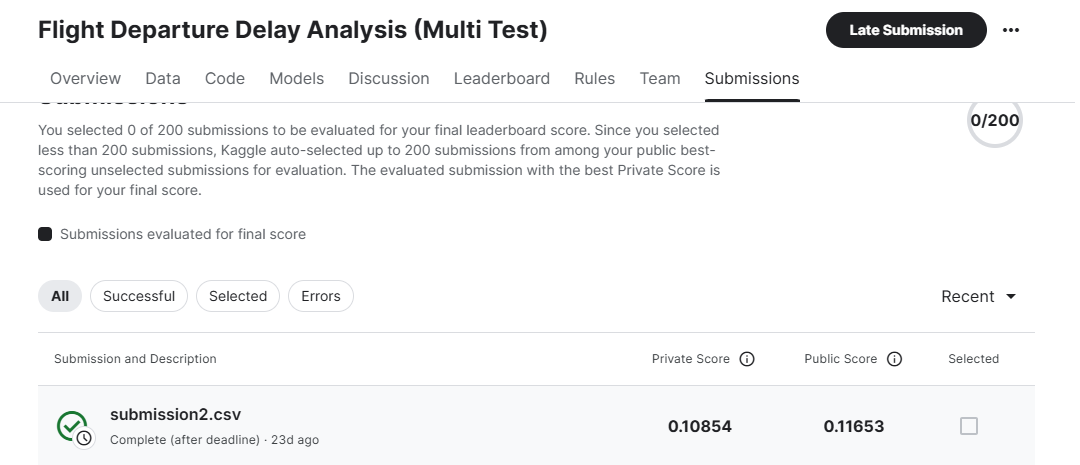

## Regression Analysis

In [793]:
train_df3['Delay In Minutes'] = train_df['departure_delay_minutes']
train_df3

,Type,Status,Departure IATA Code,Departure ICAO Code,Scheduled Time,Arrival IATA Code,Arrival ICAO Code,Arrival Estimated Time,Precipitation (in),Temperature Max,...,Humidity Max,Humidity Avg,Humidity Min,Wind Speed Max,Wind Speed Avg,Wind Speed Min,Pressure Max,Pressure Avg,Pressure Min,Delay In Minutes
0,departure,active,lhe,opla,2023-07-20 20:50:00,ruh,oerk,2023-07-20t21:54:00.000,0.0,84.3,...,75.0,59.0,89.0,9.5,0.0,13.0,28.9,28.7,28.8,0.000000
1,departure,active,lhe,opla,2023-07-20 11:35:00,dxb,omdb,2024-06-07t11:06:00.000,0.0,84.3,...,75.0,59.0,89.0,9.5,0.0,13.0,28.9,28.7,28.8,8853.571429
2,departure,active,lhe,opla,2023-07-20 22:20:00,dmm,oedf,2024-06-07t11:06:00.000,0.0,84.3,...,75.0,59.0,89.0,9.5,0.0,13.0,28.9,28.7,28.8,0.000000
3,departure,active,lhe,opla,2023-07-20 21:10:00,doh,othh,2024-06-07t11:06:00.000,0.0,84.3,...,75.0,59.0,89.0,9.5,0.0,13.0,28.9,28.7,28.8,7464.666667
4,departure,active,lhe,opla,2023-07-20 09:55:00,doh,othh,2023-07-20t11:10:00.000,0.0,84.3,...,75.0,59.0,89.0,9.5,0.0,13.0,28.9,28.7,28.8,14.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51567,departure,active,khi,opkc,2024-07-10 02:30:00,dxb,omdb,2024-07-10t03:28:00.000,0.0,90.0,...,89.0,50.0,65.2,40.0,0.0,5.4,28.8,28.8,28.7,14.000000
51568,departure,active,isb,opis,2024-07-10 03:10:00,med,oema,2024-07-10t05:57:00.000,0.0,90.0,...,89.0,50.0,65.2,40.0,0.0,5.4,28.8,28.8,28.7,18.000000
51569,departure,active,isb,opis,2024-07-10 02:10:00,dxb,omdb,2024-06-07t11:06:00.000,0.0,90.0,...,89.0,50.0,65.2,40.0,0.0,5.4,28.8,28.8,28.7,0.000000
51570,departure,active,isb,opis,2024-07-10 04:35:00,auh,omaa,2024-06-07t11:06:00.000,0.0,90.0,...,89.0,50.0,65.2,40.0,0.0,5.4,28.8,28.8,28.7,0.000000


In [794]:
X = train_df3.drop(['Delay In Minutes'], axis=1)
y = train_df3['Delay In Minutes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [795]:
for col in X_train.select_dtypes(include=['datetime64']).columns:
    X_train[f'{col}_year'] = X_train[col].dt.year
    X_train[f'{col}_month'] = X_train[col].dt.month
    X_train[f'{col}_day'] = X_train[col].dt.day
    X_train.drop(columns=[col], inplace=True)
    X_test[f'{col}_year'] = X_test[col].dt.year
    X_test[f'{col}_month'] = X_test[col].dt.month
    X_test[f'{col}_day'] = X_test[col].dt.day
    X_test.drop(columns=[col], inplace=True)

In [796]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
non_numeric_cols = X_train.select_dtypes(include=['object', 'category']).columns
if non_numeric_cols.size > 0:
    encoder = OrdinalEncoder()
    X_train[non_numeric_cols] = encoder.fit_transform(X_train[non_numeric_cols])
    X_test[non_numeric_cols] = encoder.fit_transform(X_test[non_numeric_cols])

In [797]:
X_train = X_train.fillna(0)  # Fill missing values with 0
X_test = X_test.fillna(0)  # Fill missing values with 0

In [798]:
model2 = RandomForestRegressor(n_estimators=100, random_state=42)
model2.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [799]:
y_train_pred = model2.predict(X_train)

mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)

In [800]:
print(f"Training MAE: {mae_train:.2f}")
print(f"Training MSE: {mse_train:.2f}")

Training MAE: 582.20
Training MSE: 2131726.61


In [299]:
y_pred = model1.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2061  854    0 ...    0    0    0]
 [  70   61    0 ...    0    0    0]
 [  82   53    0 ...    0    0    0]
 ...
 [   1    0    0 ...    0    0    0]
 [   0    1    0 ...    0    0    0]
 [   0    1    0 ...    0    0    0]]
              precision    recall  f1-score   support

         0.0       0.31      0.71      0.43      2915
         1.0       0.02      0.47      0.03       131
         2.0       0.00      0.00      0.00       135
         3.0       0.00      0.00      0.00       168
         4.0       0.00      0.00      0.00       181
         5.0       0.00      0.00      0.00       183
         6.0       0.00      0.00      0.00       190
         7.0       0.00      0.00      0.00       219
         8.0       0.00      0.00      0.00       220
         9.0       0.00      0.00      0.00       226
        10.0       0.00      0.00      0.00       244
        11.0       0.00      0.00      0.00       234
        12.0       0.00      0.00      0.00       232
        13.0   

C:\Users\USER 1\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER 1\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER 1\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [300]:
X1 = pd.DataFrame(X)
non_numeric_cols = X1.select_dtypes(include=['object', 'category']).columns
if non_numeric_cols.size > 0:
    encoder = OrdinalEncoder()
    X1[non_numeric_cols] = encoder.fit_transform(X1[non_numeric_cols])

In [301]:
for col in X1.select_dtypes(include=['datetime64']).columns:
    X1[f'{col}_year'] = X1[col].dt.year
    X1[f'{col}_month'] = X1[col].dt.month
    X1[f'{col}_day'] = X1[col].dt.day
    X1.drop(columns=[col], inplace=True)

In [317]:
imputer = SimpleImputer(strategy='mean')

pipeline = Pipeline([
    ('imputer', imputer),
    ('model', RandomForestRegressor(n_estimators=100))  # Replace with your model
])
scores_mae = cross_val_score(pipeline, X1, y, scoring='neg_mean_absolute_error', cv=5)
scores_rmse = cross_val_score(pipeline, X1, y, scoring='neg_root_mean_squared_error', cv=5)

mae_mean = -scores_mae.mean()
rmse_mean = -scores_rmse.mean()

In [318]:
print(f"Cross Validated MAE: {mae_mean}")
print(f"Cross Validated RMSE: {rmse_mean}")

Cross Validated MAE: 274.52110115415235
Cross Validated RMSE: 1027.0867890921095


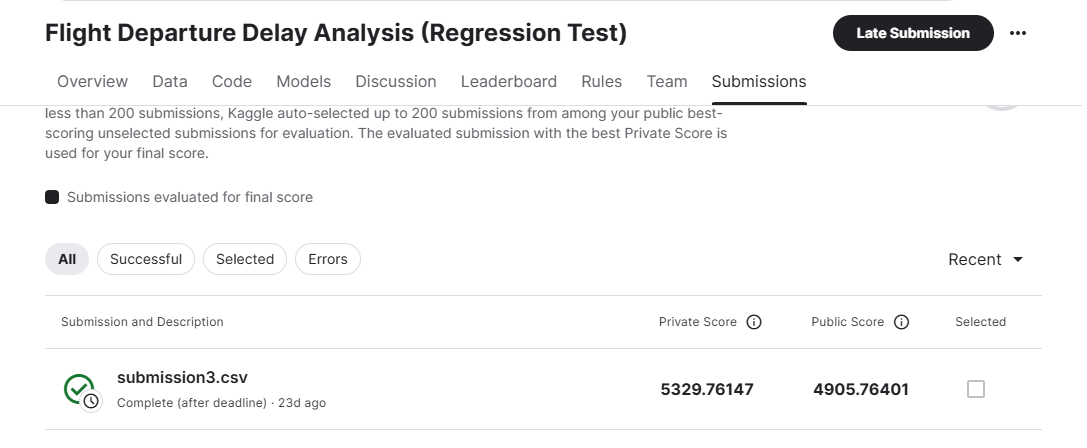

# Phase 4: Model Optimization and Evaluation

## 1. HyperParameter Tuning

## Model Comparisions

In [782]:
# Model predictions
rf_predictions = model2.predict(X_test)
logistic_predictions = model1.predict(X_test)

# Evaluate metrics
rf_accuracy = accuracy_score(y_test, rf_predictions)
logistic_accuracy = accuracy_score(y_test, logistic_predictions)

NameError: name 'rf_best' is not defined

In [ ]:
print(f"Random Forest Accuracy: {rf_accuracy}")
print(f"Logistic Regression Accuracy: {logistic_accuracy}")

# Phase 5 Model Testing

In [ ]:
for col in test_df.select_dtypes(include=['datetime64']).columns:
    test_df[col] = test_df[col].astype('int64')  # or extract specific components as needed

# Ensure all columns are numeric
test_df = test_df.select_dtypes(include=[np.number])

# Align test data with model features
test_df_aligned = test_df.reindex(columns=model.feature_names_in_, fill_value=0)
y_pred = model.predict(test_df_aligned)

In [754]:
# Map Delay values to descriptive labels
delay_mapping = {1: "on time", 0: "delayed"}
y_pred_mapped = [delay_mapping[val] for val in y_pred]

# Create a new DataFrame with correct column name casing
results_df = pd.DataFrame({
    'ID': range(1, len(y_pred) + 1),  # Continuous IDs starting from 1
    'Delay': y_pred_mapped
})

# Save to CSV without header and index
results_df.to_csv('submission.csv', index=False, header=True)

print("Predictions saved to 'submission.csv' with the correct column name.")


Predictions saved to 'submission.csv' with the correct column name.


In [778]:
for col in test_df.select_dtypes(include=['datetime64']).columns:
    test_df[col] = test_df[col].astype('int64')  # or extract specific components as needed

# Ensure all columns are numeric
test_df = test_df.select_dtypes(include=[np.number])

# Align test data with model features
test_df_aligned2= test_df.reindex(columns=model.feature_names_in_, fill_value=0)
y_pred2 = model1.predict(test_df_aligned2)

In [781]:
# Map Delay values to descriptive labels
delay_mapping = {1: "Short Delay", 2: "Moderate Delay", 3: "Long Delay", 0: "No Delayed"}
y_pred_mapped = [delay_mapping[val] for val in y_pred2]

# Create a new DataFrame with correct column name casing
results_df = pd.DataFrame({
    'ID': range(1, len(y_pred2) + 1),  # Continuous IDs starting from 1
    'Delay': y_pred_mapped
})

# Save to CSV without header and index
results_df.to_csv('submission2.csv', index=False, header=True)

print("Predictions saved to 'submission2.csv' with the correct column name.")


Predictions saved to 'submission2.csv' with the correct column name.


In [801]:
for col in test_df.select_dtypes(include=['datetime64']).columns:
    test_df[col] = test_df[col].astype('int64')  # or extract specific components as needed

# Ensure all columns are numeric
test_df = test_df.select_dtypes(include=[np.number])

# Align test data with model features
test_df_aligned3= test_df.reindex(columns=model.feature_names_in_, fill_value=0)
y_pred3 = model2.predict(test_df_aligned3)

In [802]:
# Create a DataFrame with ID and raw predictions
results_df = pd.DataFrame({
    'ID': range(1, len(y_pred2) + 1),  # Continuous IDs starting from 1
    'Delay': y_pred2  # Store raw prediction values
})

results_df.to_csv('submission3.csv', index=False, header=True)

print("Predictions saved to 'submission3.csv' with raw y_pred values.")

Predictions saved to 'submission3.csv' with raw y_pred values.
